**This project is related with Human Resource attrition where employees from company takes attrition due to various reasons here we have to identify the reasons behind  the attrition as in companies it becomes very costly to hire new employees and basically every company initially try to retain their existing resource**

In [10]:
##Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


**Observations on the first go**

**Encoding required for our label Attrition and Department,Education field in features**

**We have to check class imbalance and balance the same wherever required**

**We have 35 features including target variable we have to check contribution of features for decisioning and keeping of same**




In [12]:
###Checking the count of Duplicate values in Dataset
df.duplicated().sum()

0

In [13]:
df.shape

(1470, 35)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**As observed on the first go we need to encode the features to where object type has to be converted in integer for better understanding of Data by algorithm**

In [15]:
pd.DataFrame(df.nunique().sort_values())

,0
Over18,1
StandardHours,1
EmployeeCount,1
Gender,2
Attrition,2
PerformanceRating,2
OverTime,2
MaritalStatus,3
Department,3
BusinessTravel,3


****We can see their are many unique values present in our Dataset****

**Checking count of Null values**

In [16]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**Checking overall health of Dataset**

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


**We need to visualize the same in order to understand description of Data set in a Better way**

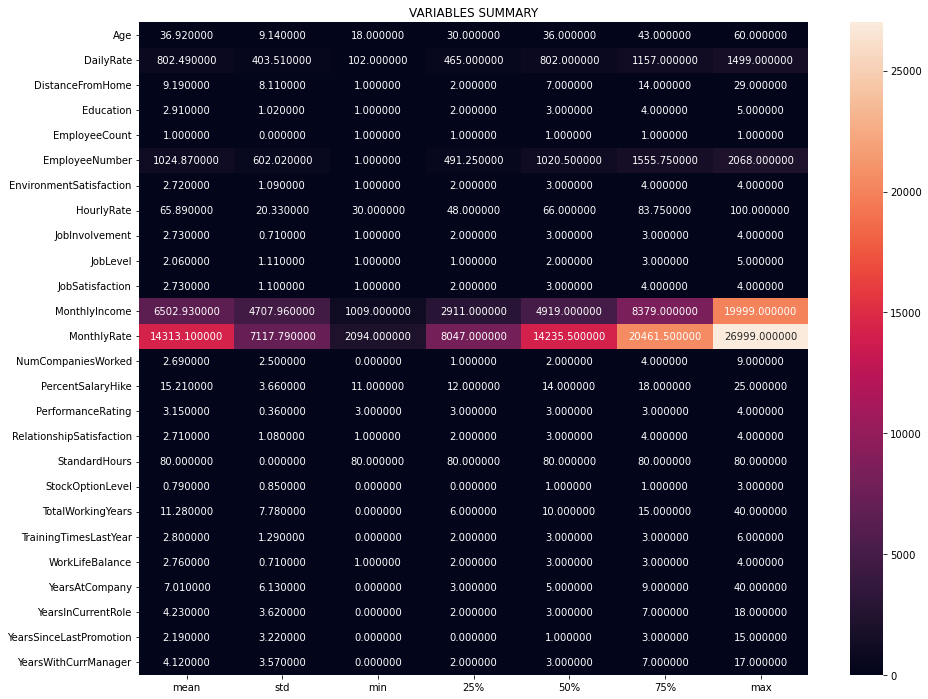

In [18]:
df.describe()
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,fmt='f')
plt.xticks
plt.yticks
plt.title("VARIABLES SUMMARY")
plt.show()

                                               **Observations**

**Since features are in copious amount we need to visualize the data to understand Skewness and presence of outliers in Dataset for analysis comparison and decisioning**

**On the first go some of features are showing a satisfactory distribution of Data where some of them has shown presence of outliers and skewness,we need to visualize the same in a deeper sense to understand the facts**

In [19]:
##Replacing values for our target variable##
df['Attrition'].replace("No", 0, inplace = True)
df['Attrition'].replace("Yes", 1, inplace = True)

**Encoding**

**Creating variable for all Object type features**

In [20]:
object_col = df[['JobRole',
 'Gender',
 'Department',
 'OverTime',
 'Over18',
 'MaritalStatus',
 'BusinessTravel',
 'EducationField']]

In [21]:
from sklearn.preprocessing import LabelEncoder
Le= LabelEncoder()


for i in object_col:
    df[i]=Le.fit_transform(df[i])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int32
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

**We are satisfied with the encoding part**

**Correlation and Multi_collinearity check**

<AxesSubplot:>

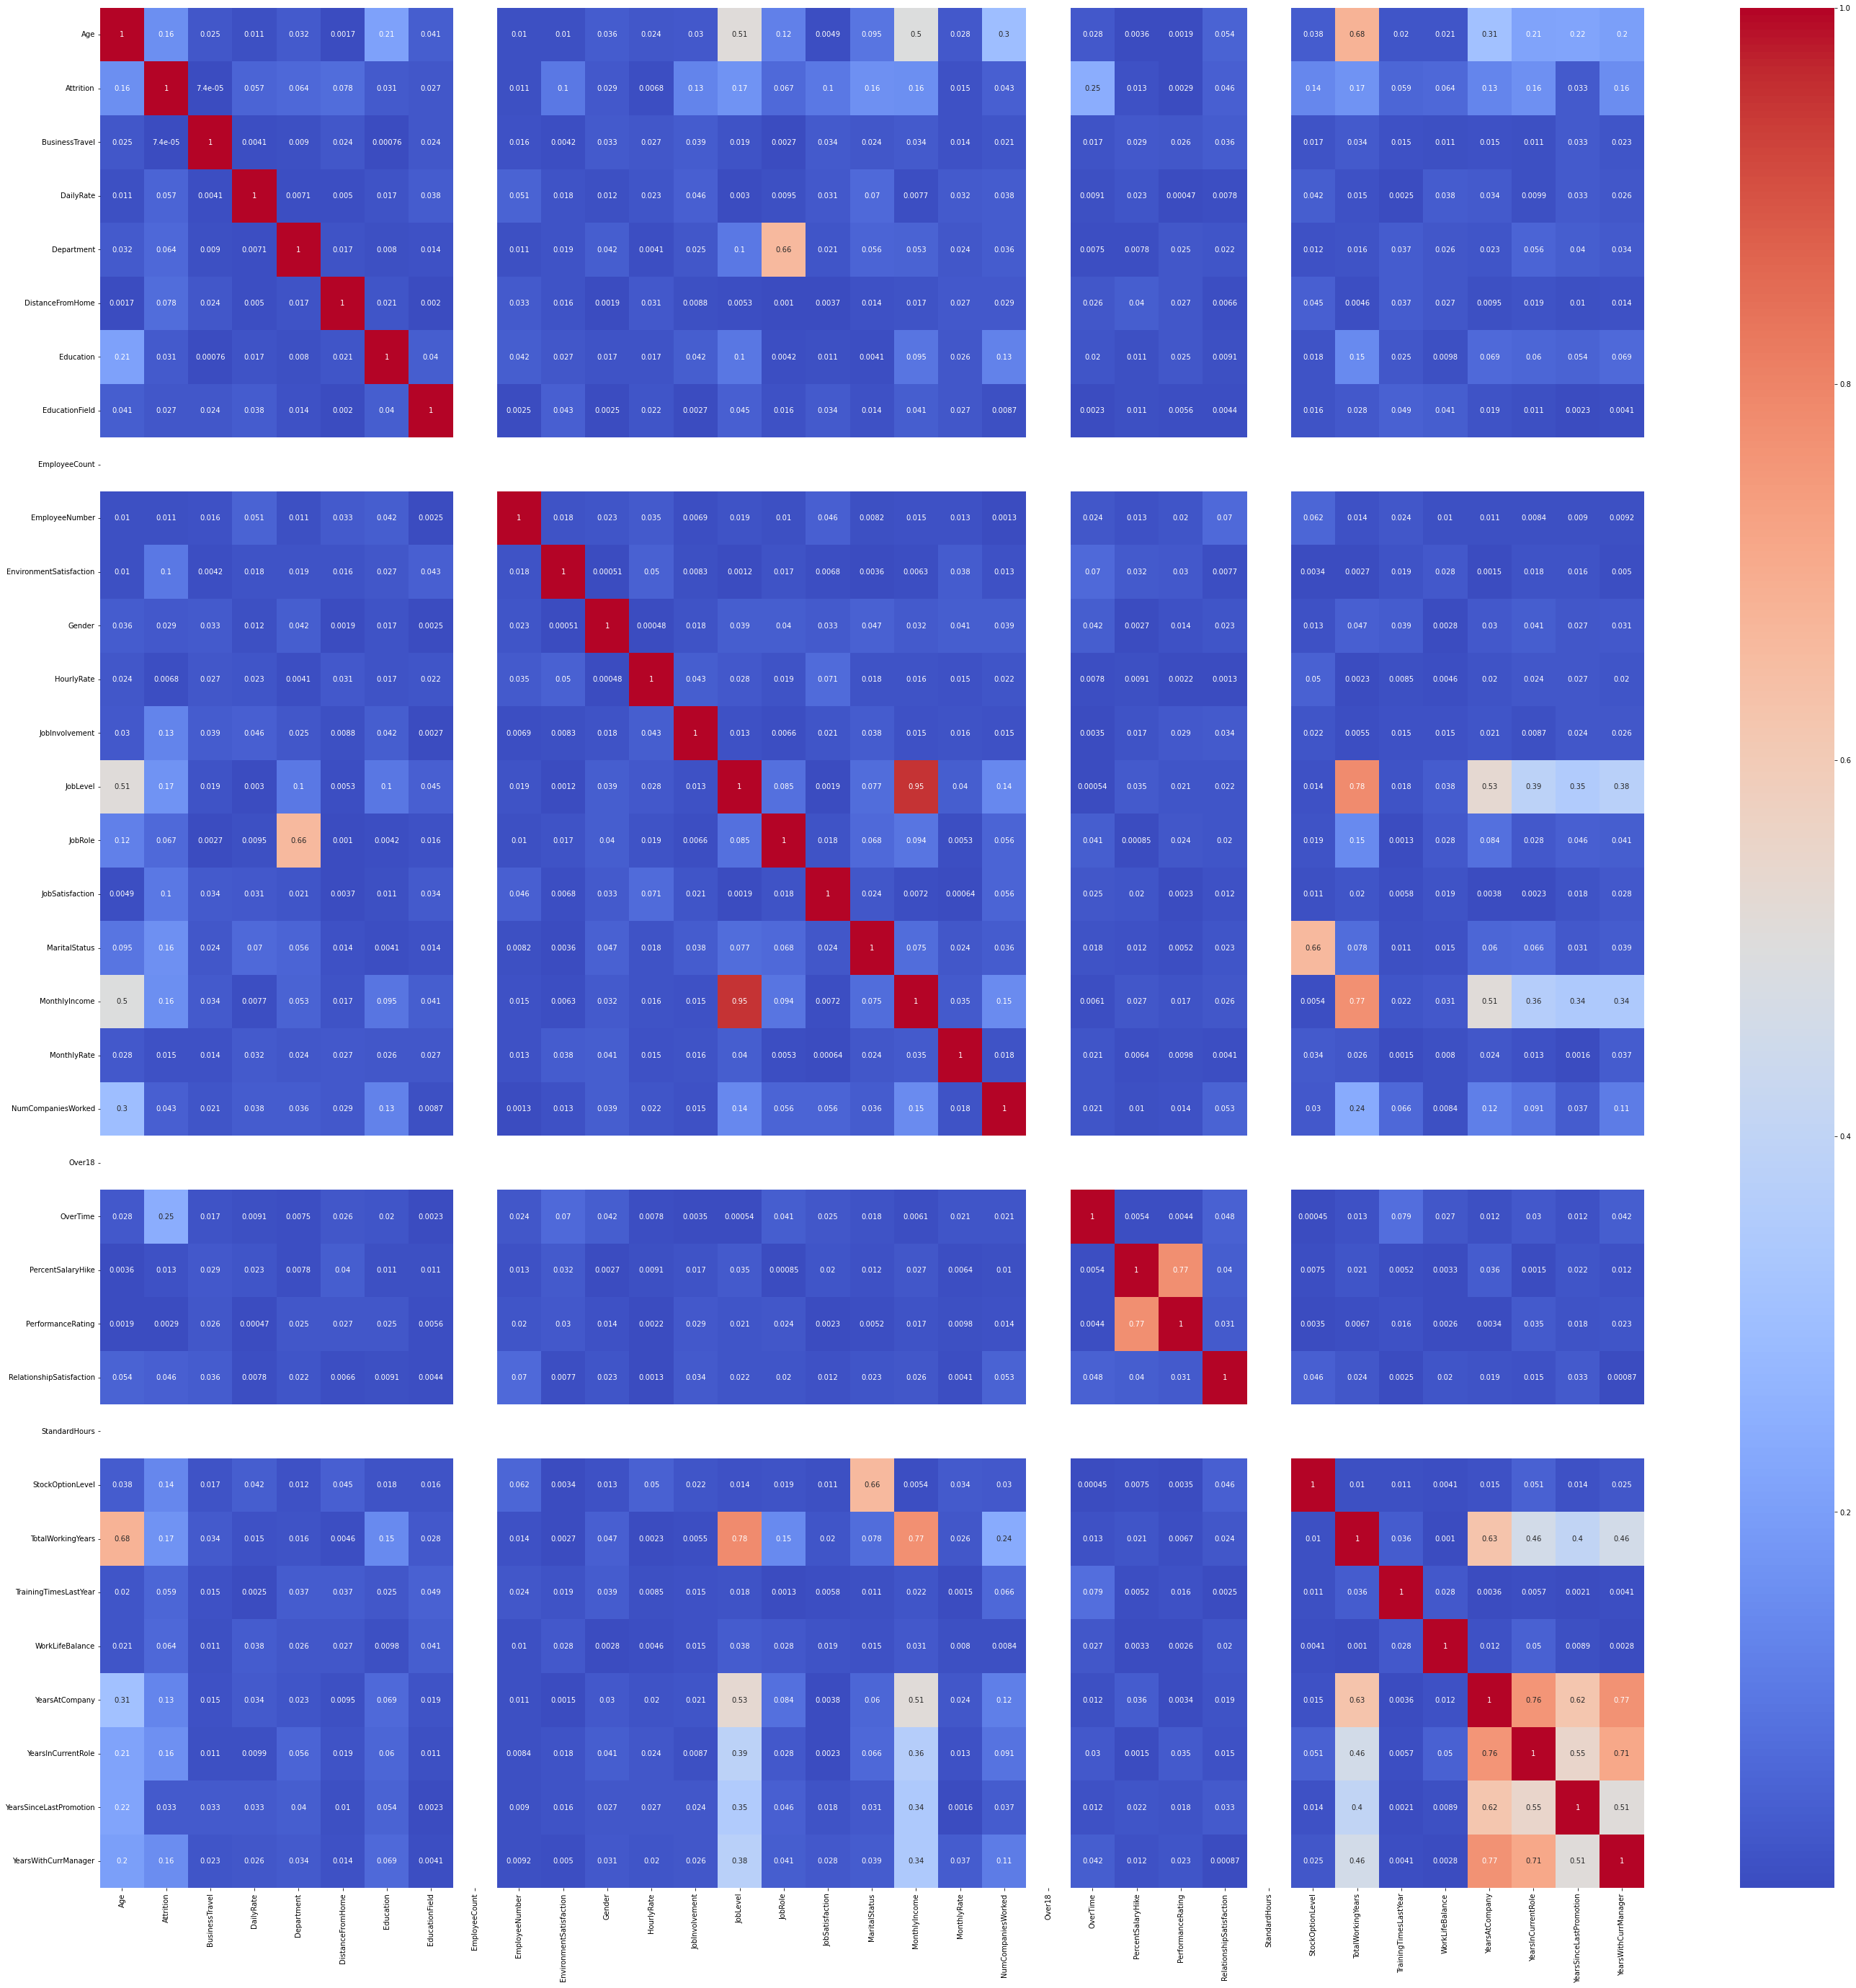

In [23]:
df_corr=df.corr().abs()
plt.figure(figsize=(48,48))
sns.heatmap(df_corr,annot=True,cmap='coolwarm')

**We need to print correlation manually in order to understand the data**

In [24]:
pd.DataFrame(df.corr()['Attrition'].sort_values())

,Attrition
TotalWorkingYears,-0.171063
JobLevel,-0.169105
YearsInCurrentRole,-0.160545
MonthlyIncome,-0.159840
Age,-0.159205
YearsWithCurrManager,-0.156199
StockOptionLevel,-0.137145
YearsAtCompany,-0.134392
JobInvolvement,-0.130016
JobSatisfaction,-0.103481


**EmployeeCount,Over18,StandardHours are showing no correlation whatsoever with our Target variable we are dropping these features**

**Though correlation is observed b/w -1 to +1 but here negatively correlated features are to checked in a deeper sense to understand their relationship with target variable**


In [25]:
df.drop(columns=['EmployeeCount','Over18','StandardHours'],axis=1,inplace=True)

**Employee number is a unique indentity given to employees ,here in Attrition their is no relation to keep the extra column even correlation we can visualize and interprate it is merely correlated ,we are dropping the same**

In [26]:
df.drop(columns=['EmployeeNumber'],inplace=True)

**Ouliers Visualization**

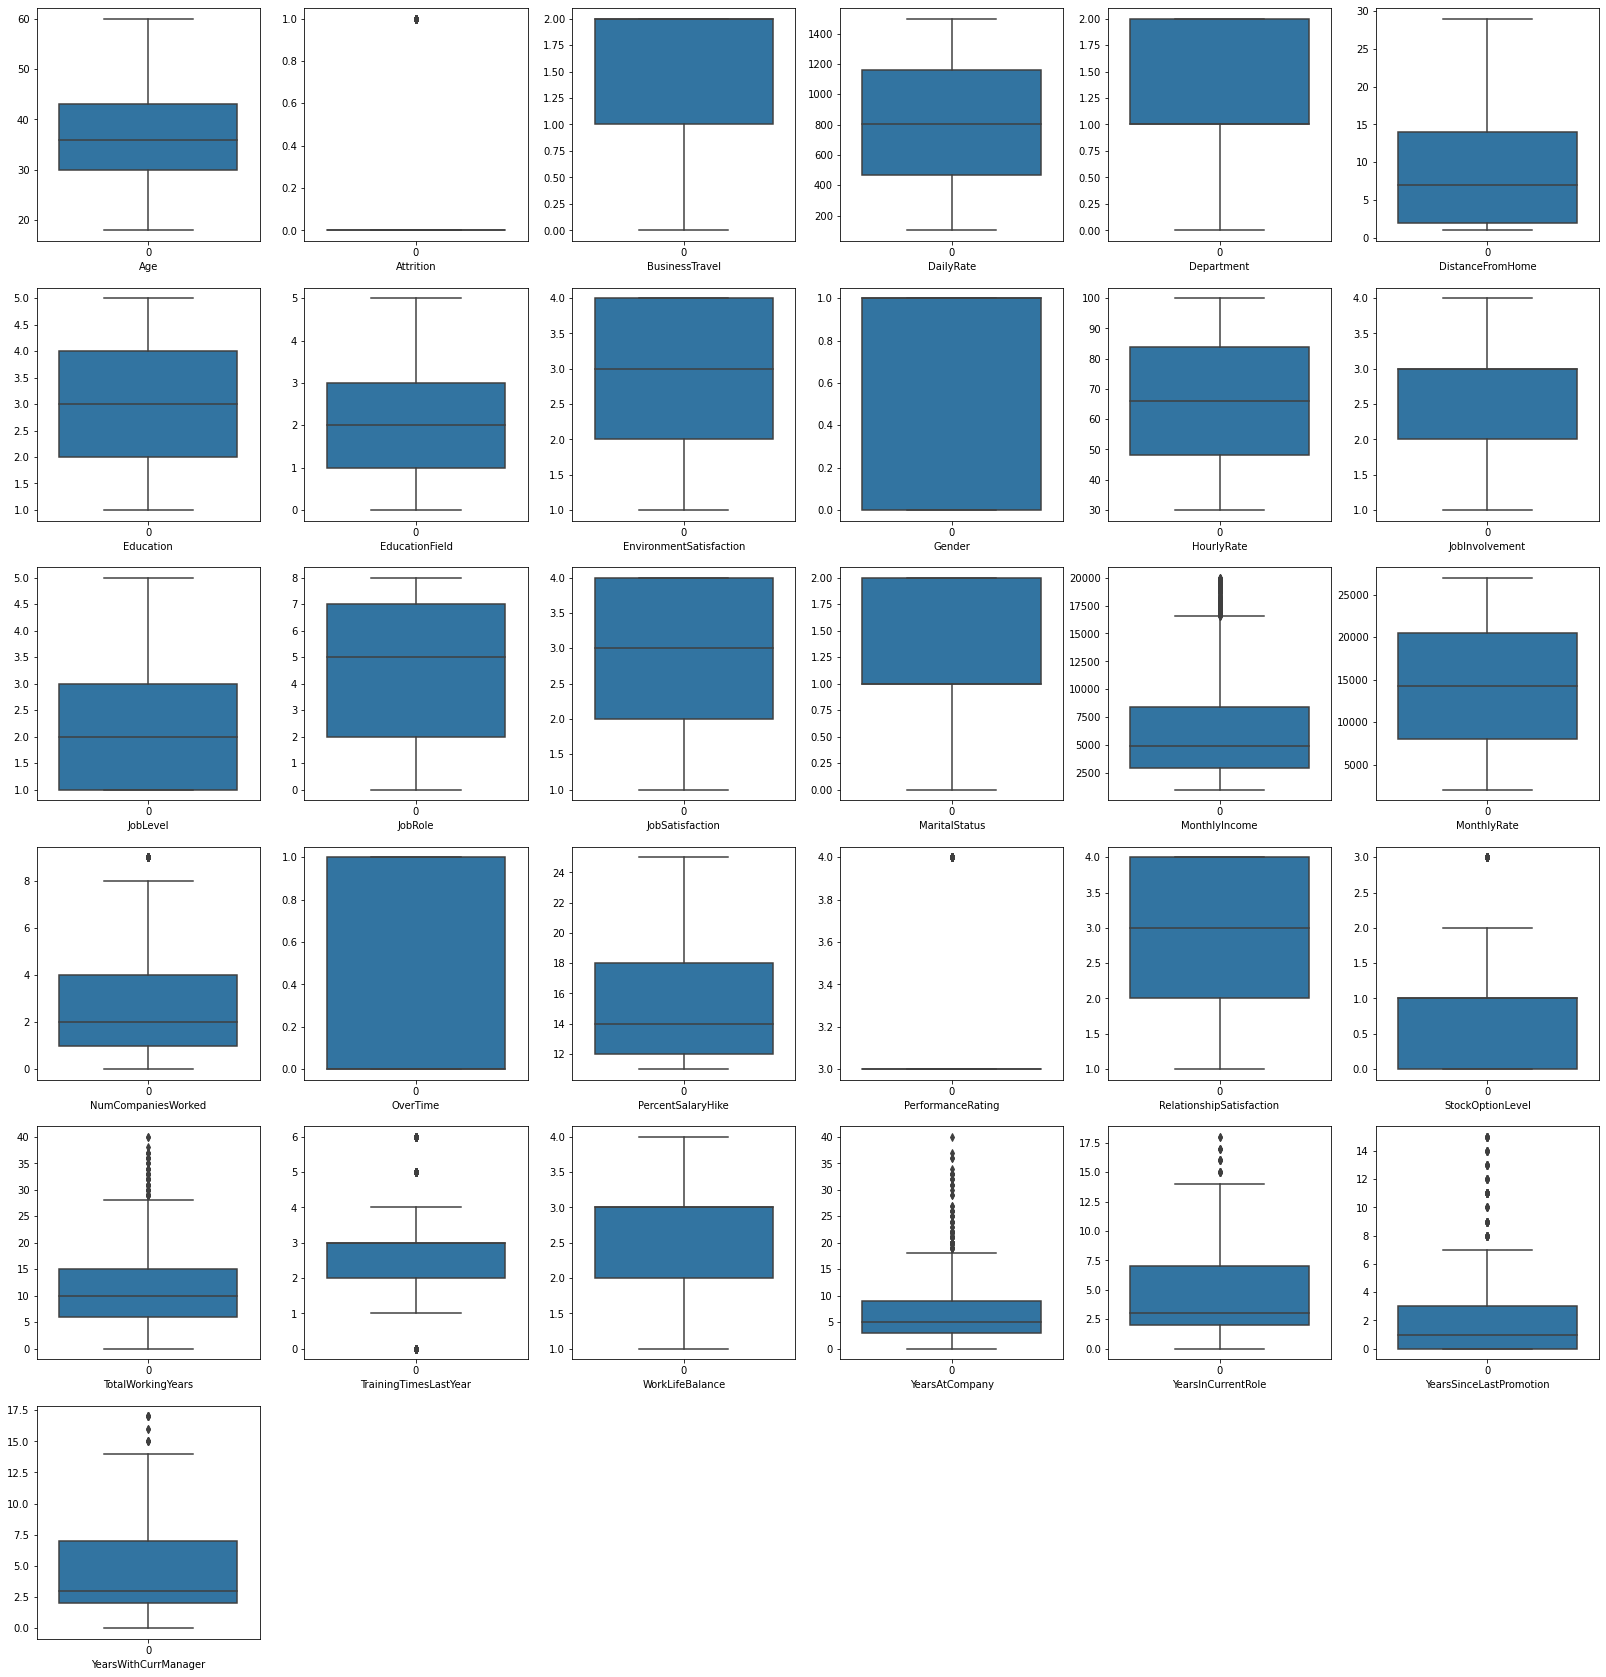

In [27]:
plt.figure(figsize=(28,30))
plotnumber=1
for column in df:
    if plotnumber<=36:
        plt.subplot(6,6,plotnumber)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.show()   

 **Observations**
                                   
**Years since last promotion at compny and in current role are showing outliers on the higher side we need to treat them**

**We can see the features which are time bounded and are related to experience are showing outliers as compared to other features,we need to visualize their relationship with Target variable to undersatnd the insights before removing outliers whether these all features are important**

In [28]:
age_features = df[['TotalWorkingYears','YearsInCurrentRole','YearsWithCurrManager','YearsAtCompany','TrainingTimesLastYear','YearsSinceLastPromotion']]
Y = df['Attrition']

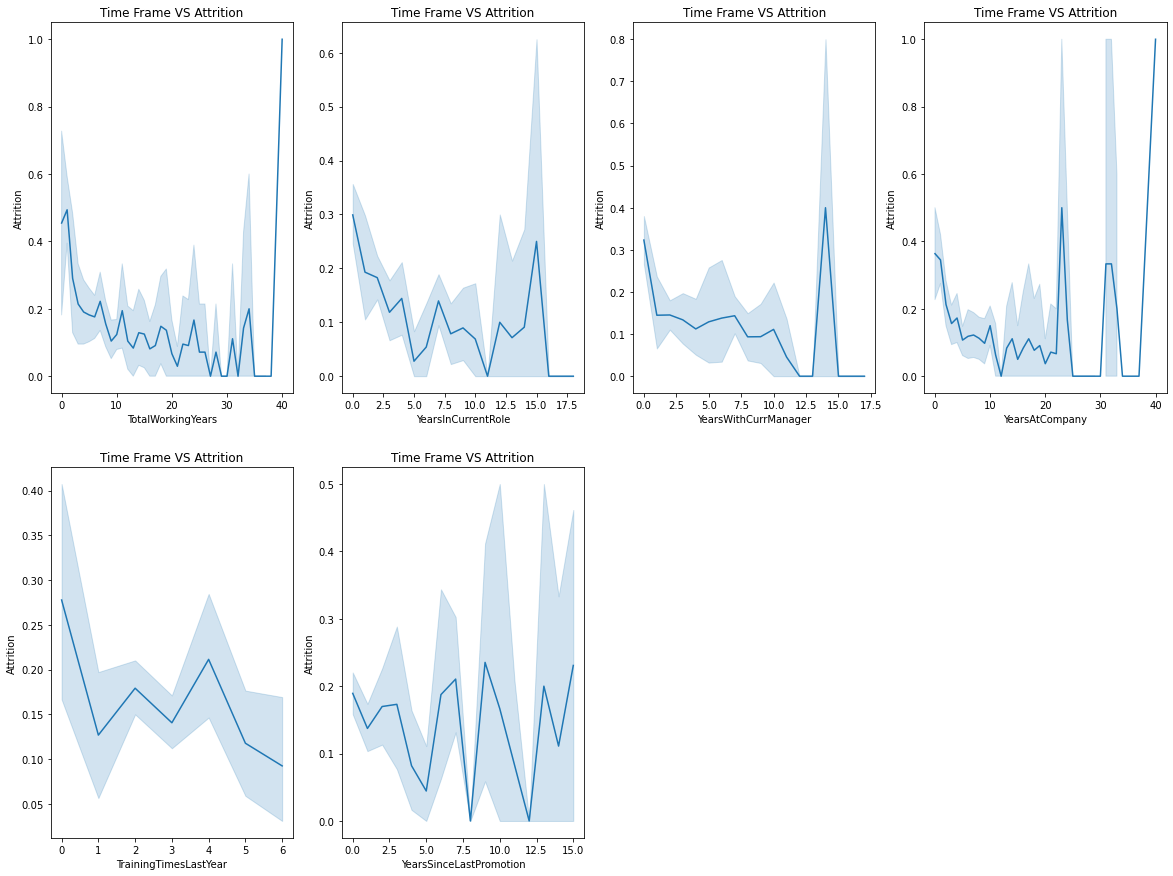

In [29]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in age_features:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.lineplot(age_features[column],Y)
        plt.title('Time Frame VS Attrition')
        
    
    plotnumber+=1
    
plt.show() 

 **Observations**

**As in increase in total working years employees are prefering the same company but after 35-38 years of work experience the attrition rate is higher this indicates if employee is  working mpore in terms of years he tends to retire from the same company**

**We can visualize if employees are prefered to stay more than 12 years in current role than employee prefers to change the company as in all if companies keep on giving the new tasks to existing employees the attrition rate will be much lower**

**Working under the same manager has been visualized as employees working under same manager for aggregating years tends to have very less attrition which clearly indicates the empathy in relationships at workplace decreases attrition**

**Their is a trend which has been observed that when working years of employees reaches between 20-23 years their are more chances of Attrition and we can also visualize in the starting years employees are choosing attrition**

**With an increased training times attrition falls here we can say training part is beneficial for keeping resource of company with company**

**Promotions has a equivalent effect with increase in years according to skills promotions has be integrated to avoid attritions**

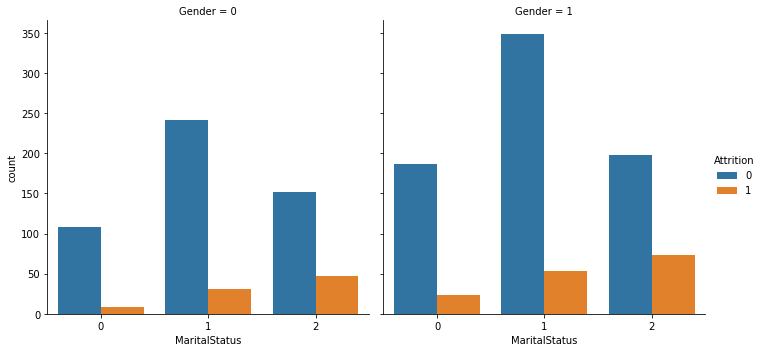

In [30]:
sns.catplot(x='MaritalStatus',hue='Attrition',col='Gender',kind='count',data=df)

**Observations**
                                         
**Married females has a very less attritions if we compare the same from Divorced and single females**

**Married males are also showing the same trend as of females,this indicates the married Males and Females prefers very less attritions as compared with Divorced and Singles**

**Companies can make a seprate clusters of married males and females and consider them an asset of company for longer period of time**

<Figure size 1080x864 with 0 Axes>

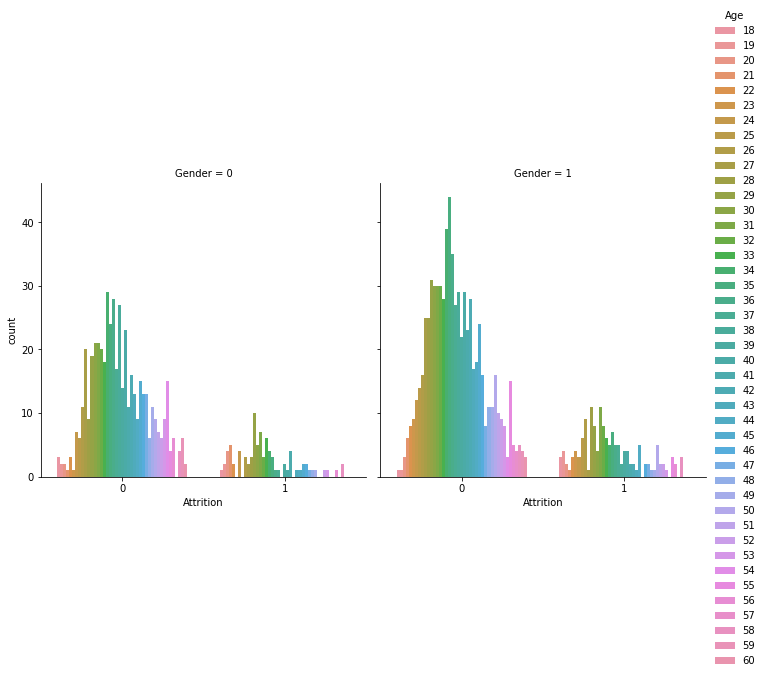

In [31]:
plt.figure(figsize=(15,12))
sns.catplot(x='Attrition',hue='Age',col='Gender',kind='count',data=df)

**Observations**
                                        
**Males and Females in the age segment of 30-40 years has shown a trend of staying in same company where attritions at this age are very miniscule for bth the genders if we compare the same**

**Companies must focus on people of age group 30-40 to make them work till retirement/death for the same company as they tends to prefer the same company they are working for**

<AxesSubplot:xlabel='Department', ylabel='count'>

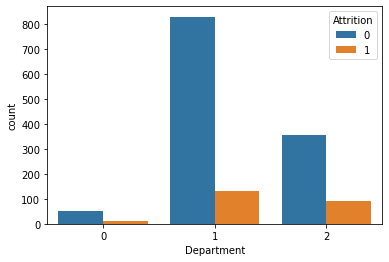

In [32]:
sns.countplot(x='Department',hue='Attrition',data=df)

**Observations**
                                        
**Employees in reasearch and development tends to stay for longer as compared with employees of other departments where in attritions same department is also contributing to the highest**


**Visualization of Daily rate and Monthly rate and MonthlyIncome employees for comparing their attritions ratio***

In [33]:
non_permanent = df[['DailyRate','MonthlyRate','MonthlyIncome']]

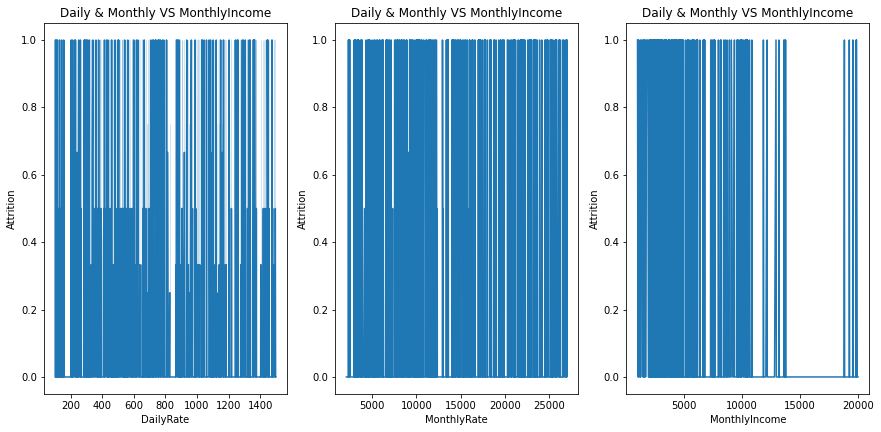

In [34]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in non_permanent:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.lineplot(non_permanent[column],Y)
        plt.title('Daily & Monthly VS MonthlyIncome')
        
    
    plotnumber+=1
    
plt.show() 

 **Observations**
                                      
**Their is same trend of attritions has been visualized  amongst Daily rate and Monthly rate employees where employees with monthly income has shown a gap,companies must prefer employees with monthly income as compared with daily and monthly rate even we need to understand a trend where monthly income employees has shown zer attritions between 13000-17000 this salary bar employees must be taken care of by companies as post this bar attritions on a lesser note are coming back**                                    

In [35]:
work_life = df[['EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','JobRole']]

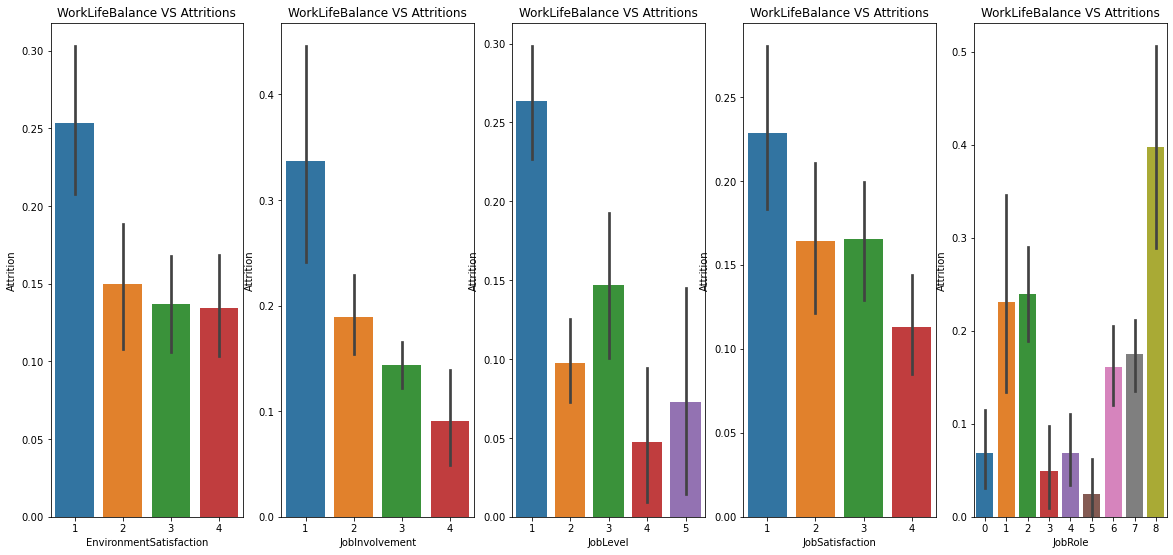

In [36]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in work_life:
    if plotnumber<=10:
        ax=plt.subplot(2,5,plotnumber)
        sns.barplot(work_life[column],Y)
        plt.title('WorkLifeBalance VS Attritions')
        
    
    plotnumber+=1
    
plt.show() 

                                              **Observations**

**When these work life balacing features for employees are in controll companies have noticed a very less attrition rates where employees are found to choose attritions when these features has a lower scale**

**These features can be pillars for mental health of any employee,thus companies needs to work harder on these features to ascertain less attritions**

**Job role has specified that their are certain roles which has shown a very higher attritions their companies need to analyse the situation and have to take corrective measures**

<AxesSubplot:xlabel='BusinessTravel', ylabel='Attrition'>

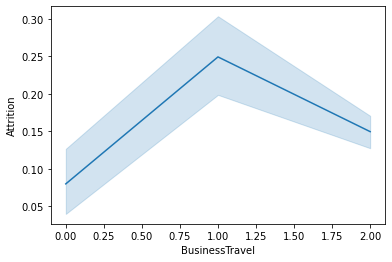

In [37]:
sns.lineplot(x='BusinessTravel',y='Attrition',data=df)

**Observations**

**Employees Travelling part has a balanced affect on attritions or maybe we can saythat travelling is a integral part of every company where company has liberty to decide travel of their employees maybe travel is for visits maybe for training purpose or field work**

**Logically it depends upon the profile and work of individual assigned by the company**

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Attrition'>

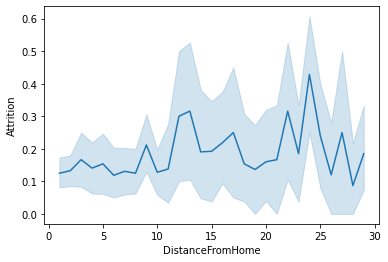

In [38]:
sns.lineplot(x='DistanceFromHome',y='Attrition',data=df)

**Observations**

**Employees working away from home has shown a growth in attritions where employees in satisfactory range from their native places has been visualized with less attritions**

In [39]:
edu = df[['Education','EducationField']]

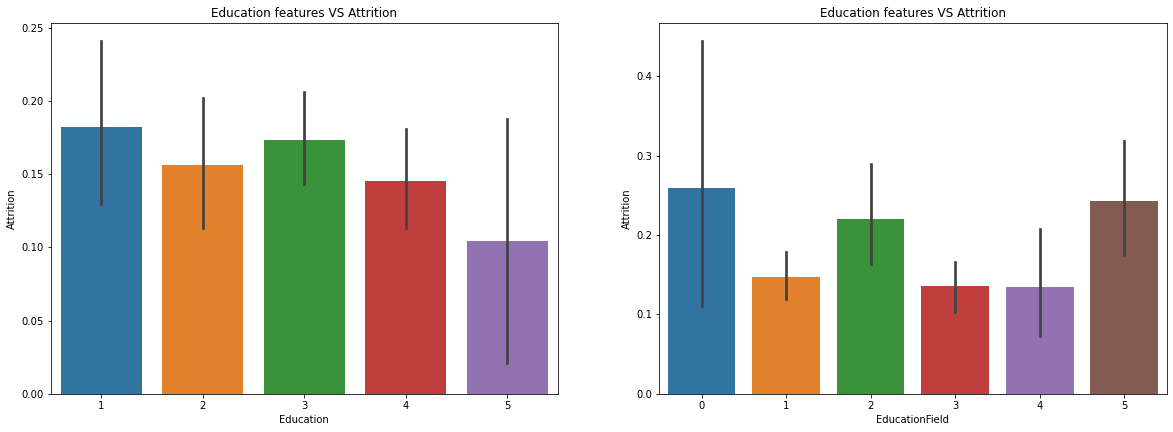

In [40]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in edu:
    if plotnumber<=8:
        ax=plt.subplot(2,2,plotnumber)
        sns.barplot(edu[column],Y)
        plt.title('Education features VS Attrition')
        
    
    plotnumber+=1
    
plt.show() 

**Observations**

**Type and level of education both are showing the same trens and it has been visualized that almost from all fields their is a difference of 10% of attritions, so hereby no specific field can be described as mos contributing to attritions we can conclude that education and its type both have same proportions of attritions**


In [41]:
oth_feat = df[['NumCompaniesWorked','PercentSalaryHike','PerformanceRating','StockOptionLevel']]

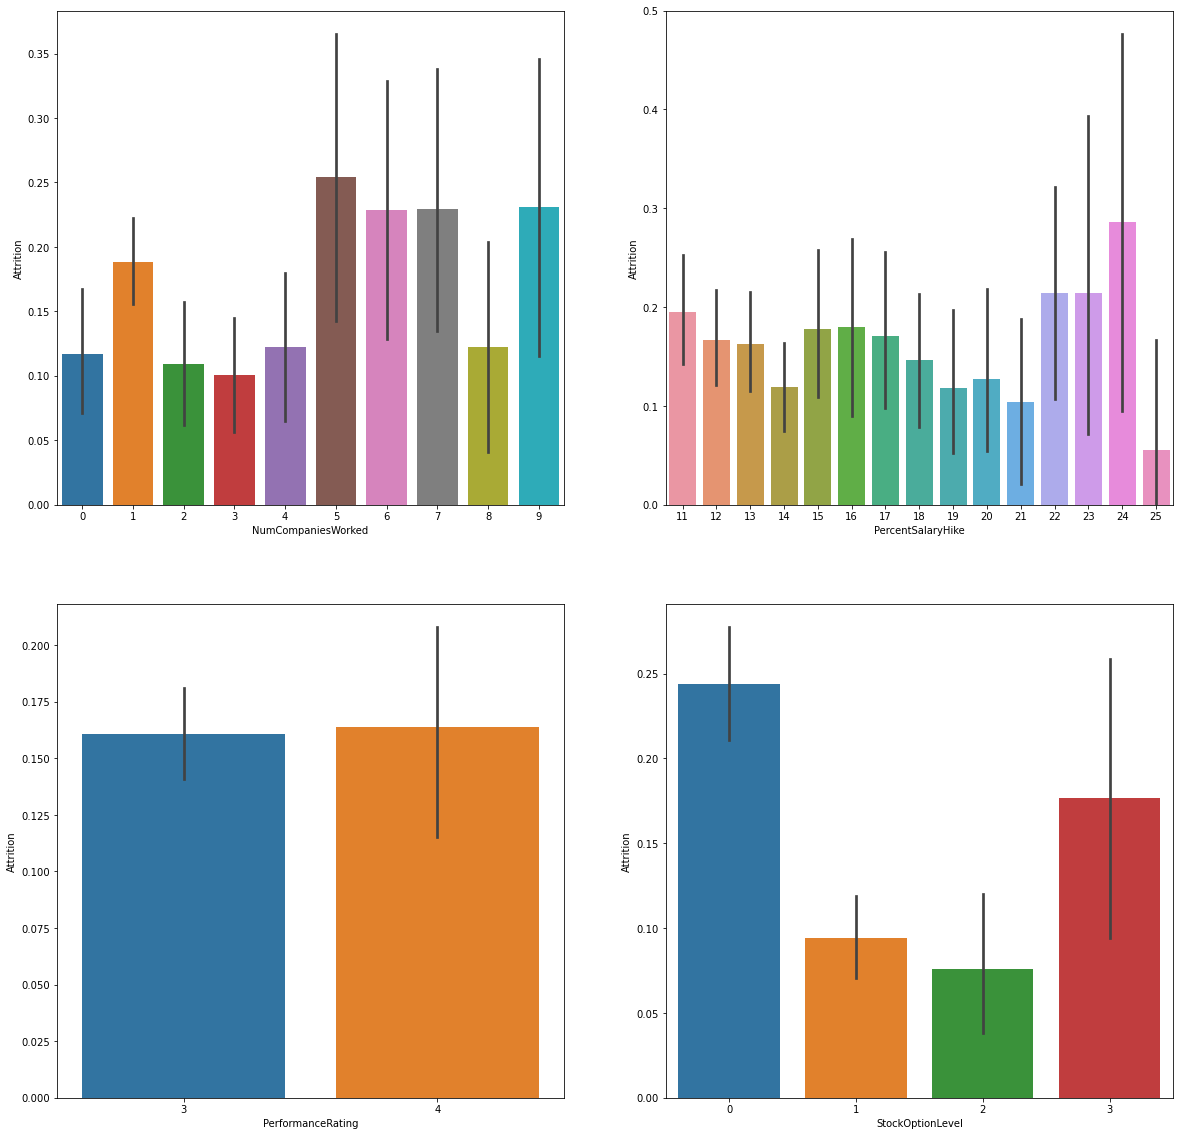

In [42]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in oth_feat:
    if plotnumber<=8:
        ax=plt.subplot(2,2,plotnumber)
        sns.barplot(oth_feat[column],Y)
        
        
    
    plotnumber+=1
    
plt.show() 

**Observations**

**Employees who has worked in range of 1-4 companies have very less chances of attritions where in increse in number of change of companies for an employee gives a direct rise to attritions.

**More than 25% of percentage salary hike gives us a result of less attritions,companies according to skill set of their employees during the hike periods must cover the gap or may take the hike closer to this mark**

**Performance ratings are integral part of company in which non performers may get fired by company here both segments are giving equal count of attritions**

**stock option between 1-2 is giving us a very less attritions where in zero stocks attritions are very higher**

<AxesSubplot:>

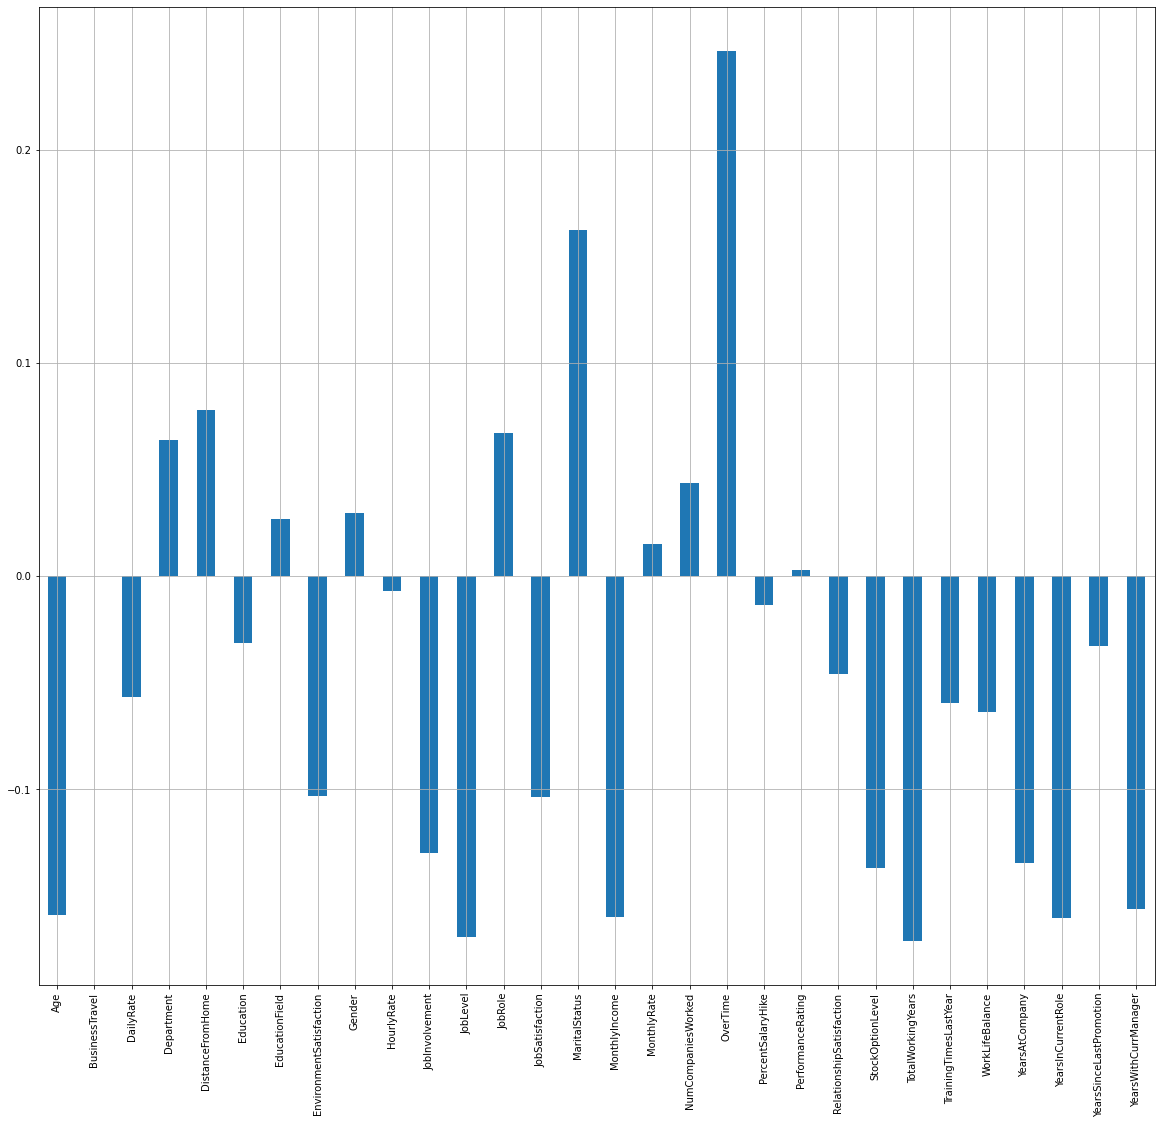

In [43]:
df.drop('Attrition',axis=1).corrwith(df.Attrition).plot(kind='bar',grid=True,figsize=(20,18))

**Observations**

**we are not going to drop further any of feature as in visualization we have founded all features to have logical relation with our target variable**

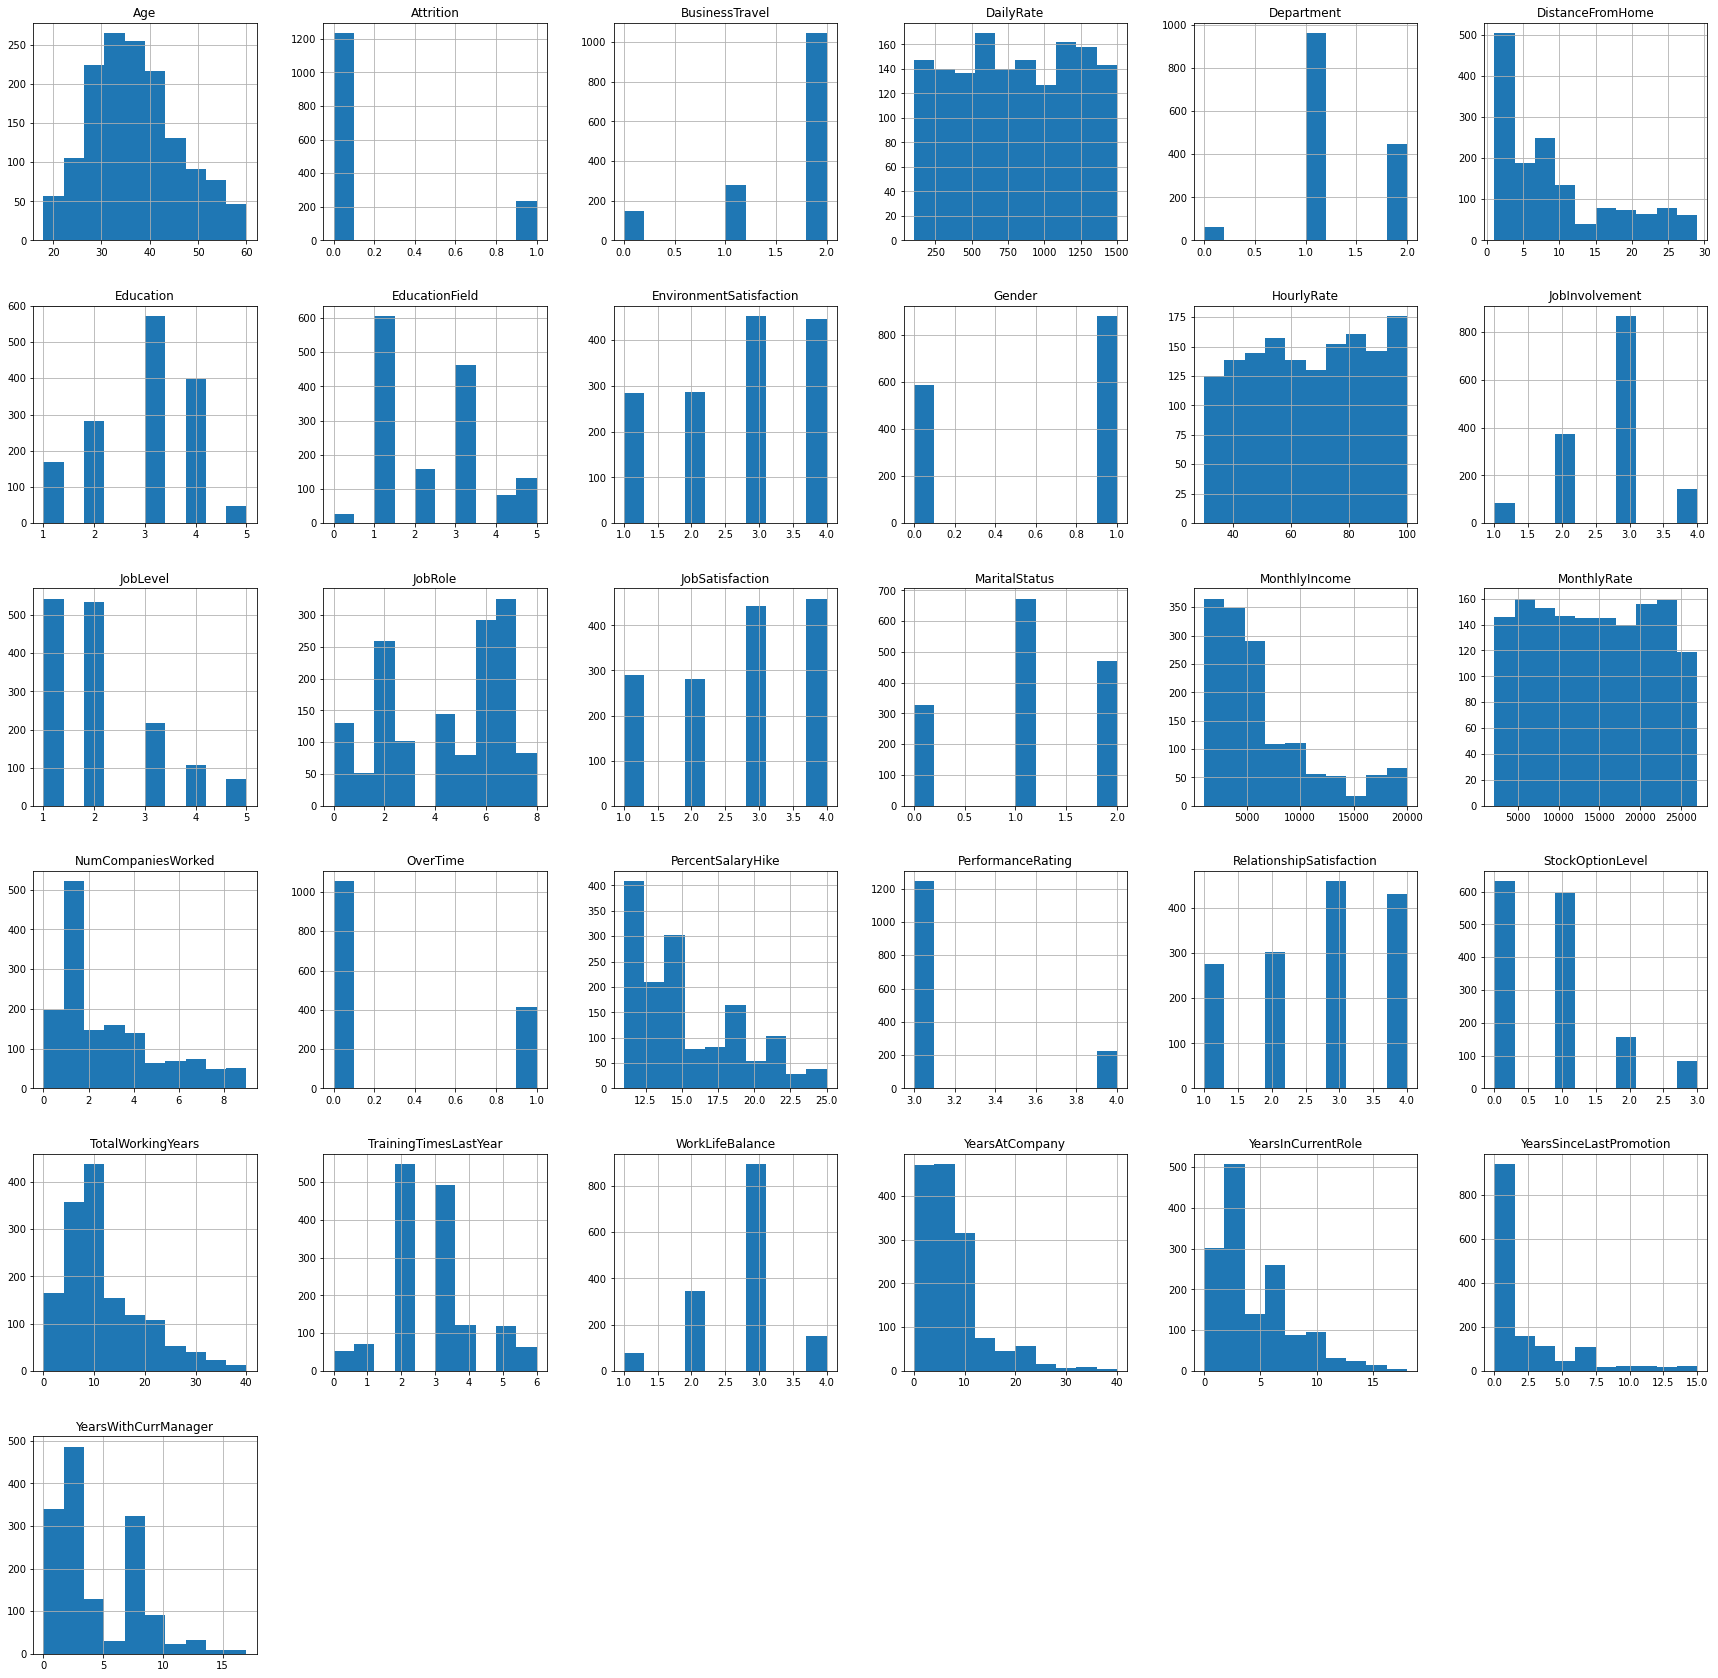

In [44]:
df.hist(figsize=(30,30))
plt.show()

**We have Data on same Scale and is ready for further processing**

**Removing Outliers**

In [45]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (1470, 31)
Shape of the dataframe after removing outliers:  (1387, 31)
Percentage of data loss post outlier removal:  5.646258503401361


**Percentage loss is acceptable**

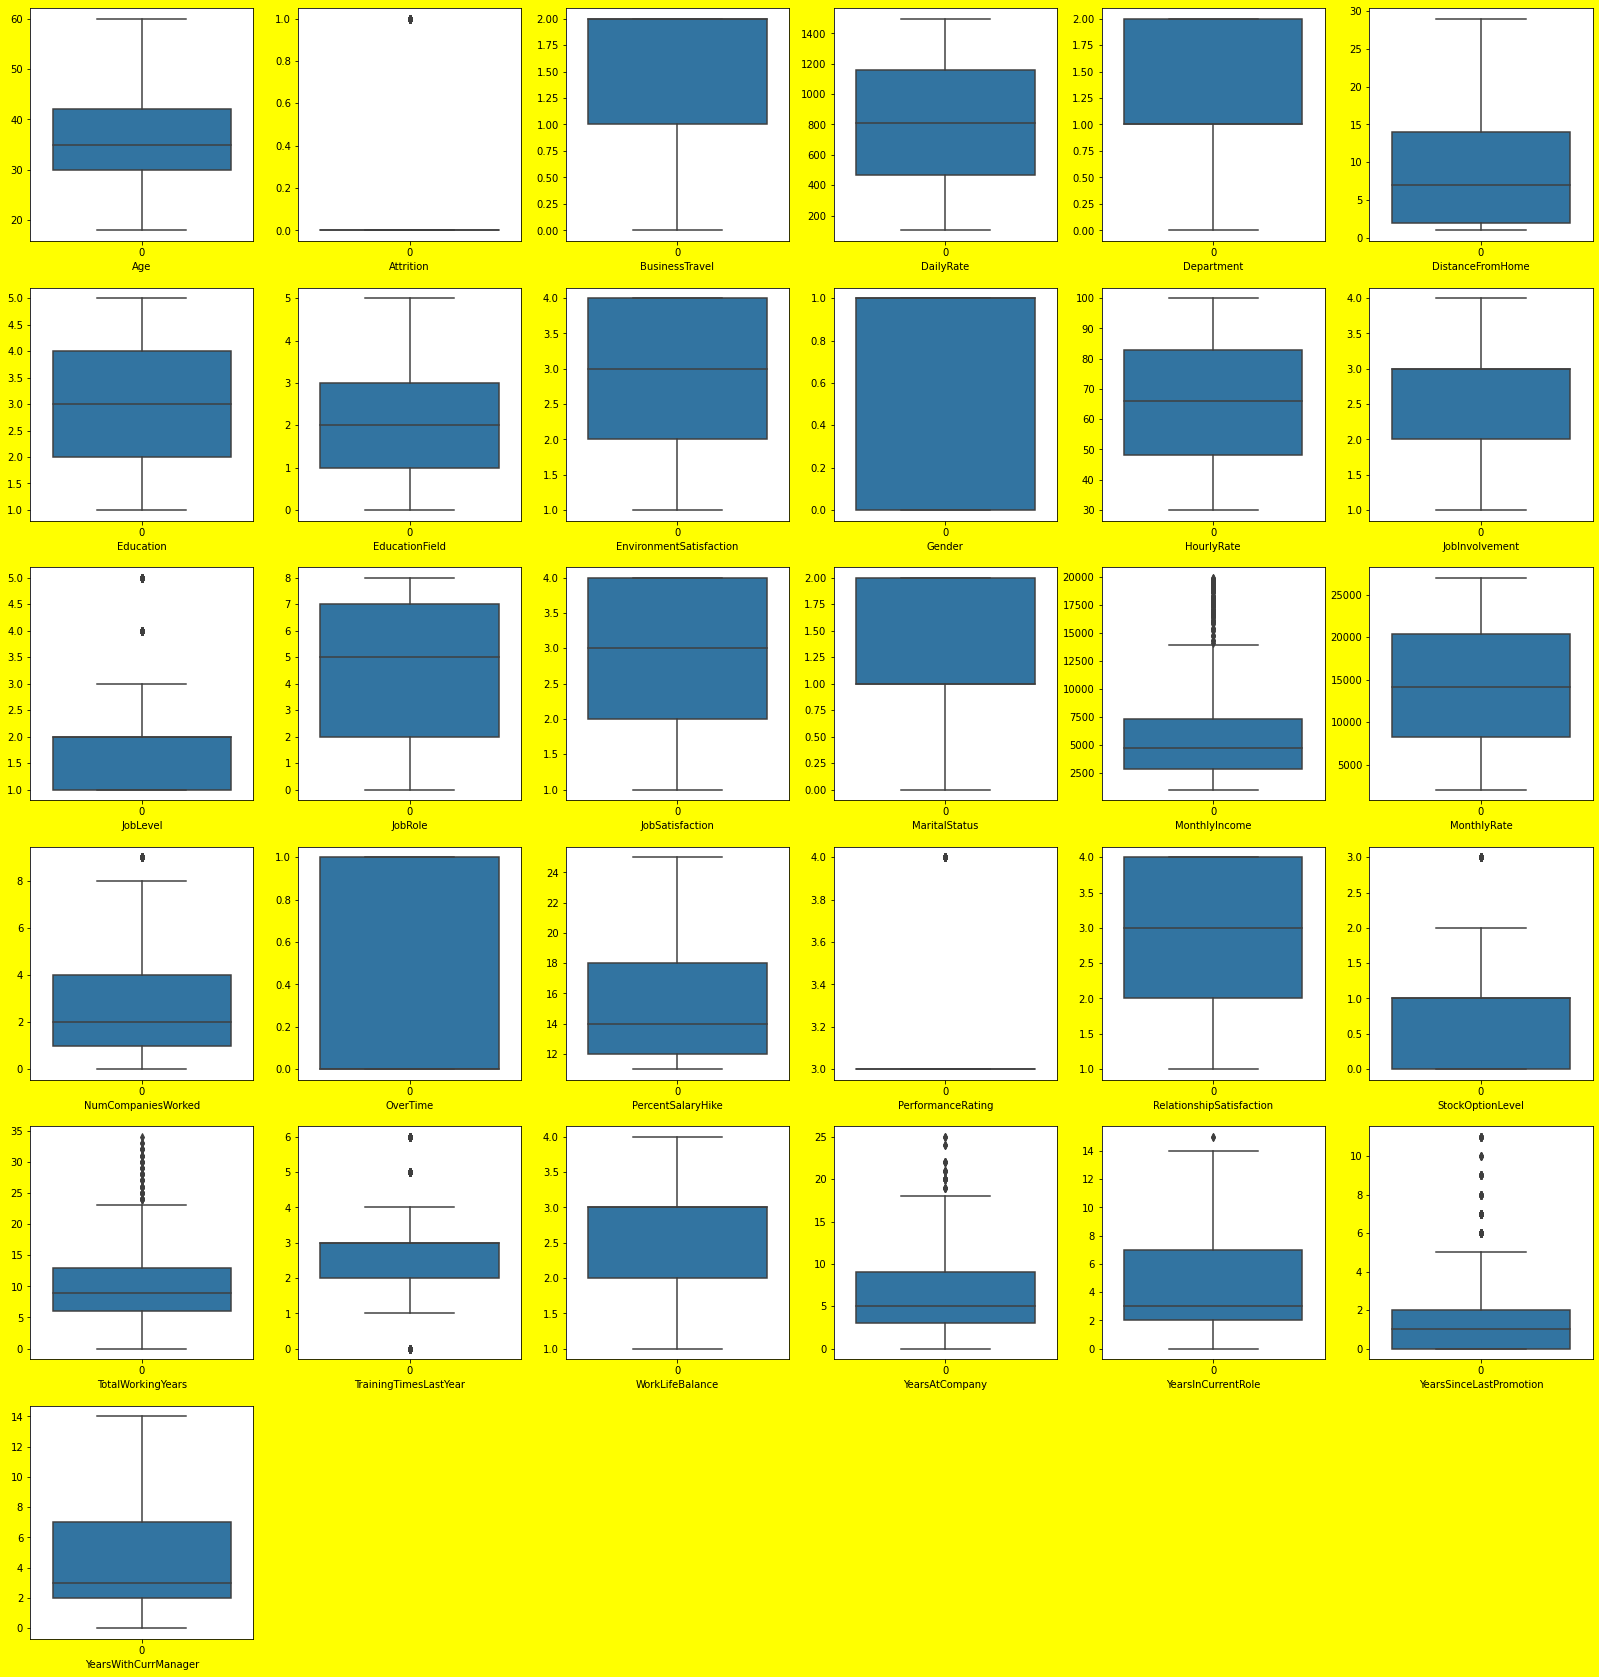

In [46]:
plt.figure(figsize=(28,30),facecolor='yellow')
plotnumber=1
for column in df:
    if plotnumber<=36:
        plt.subplot(6,6,plotnumber)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.show()   

**Outliers has been visualized as in complete controll**

In [47]:
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

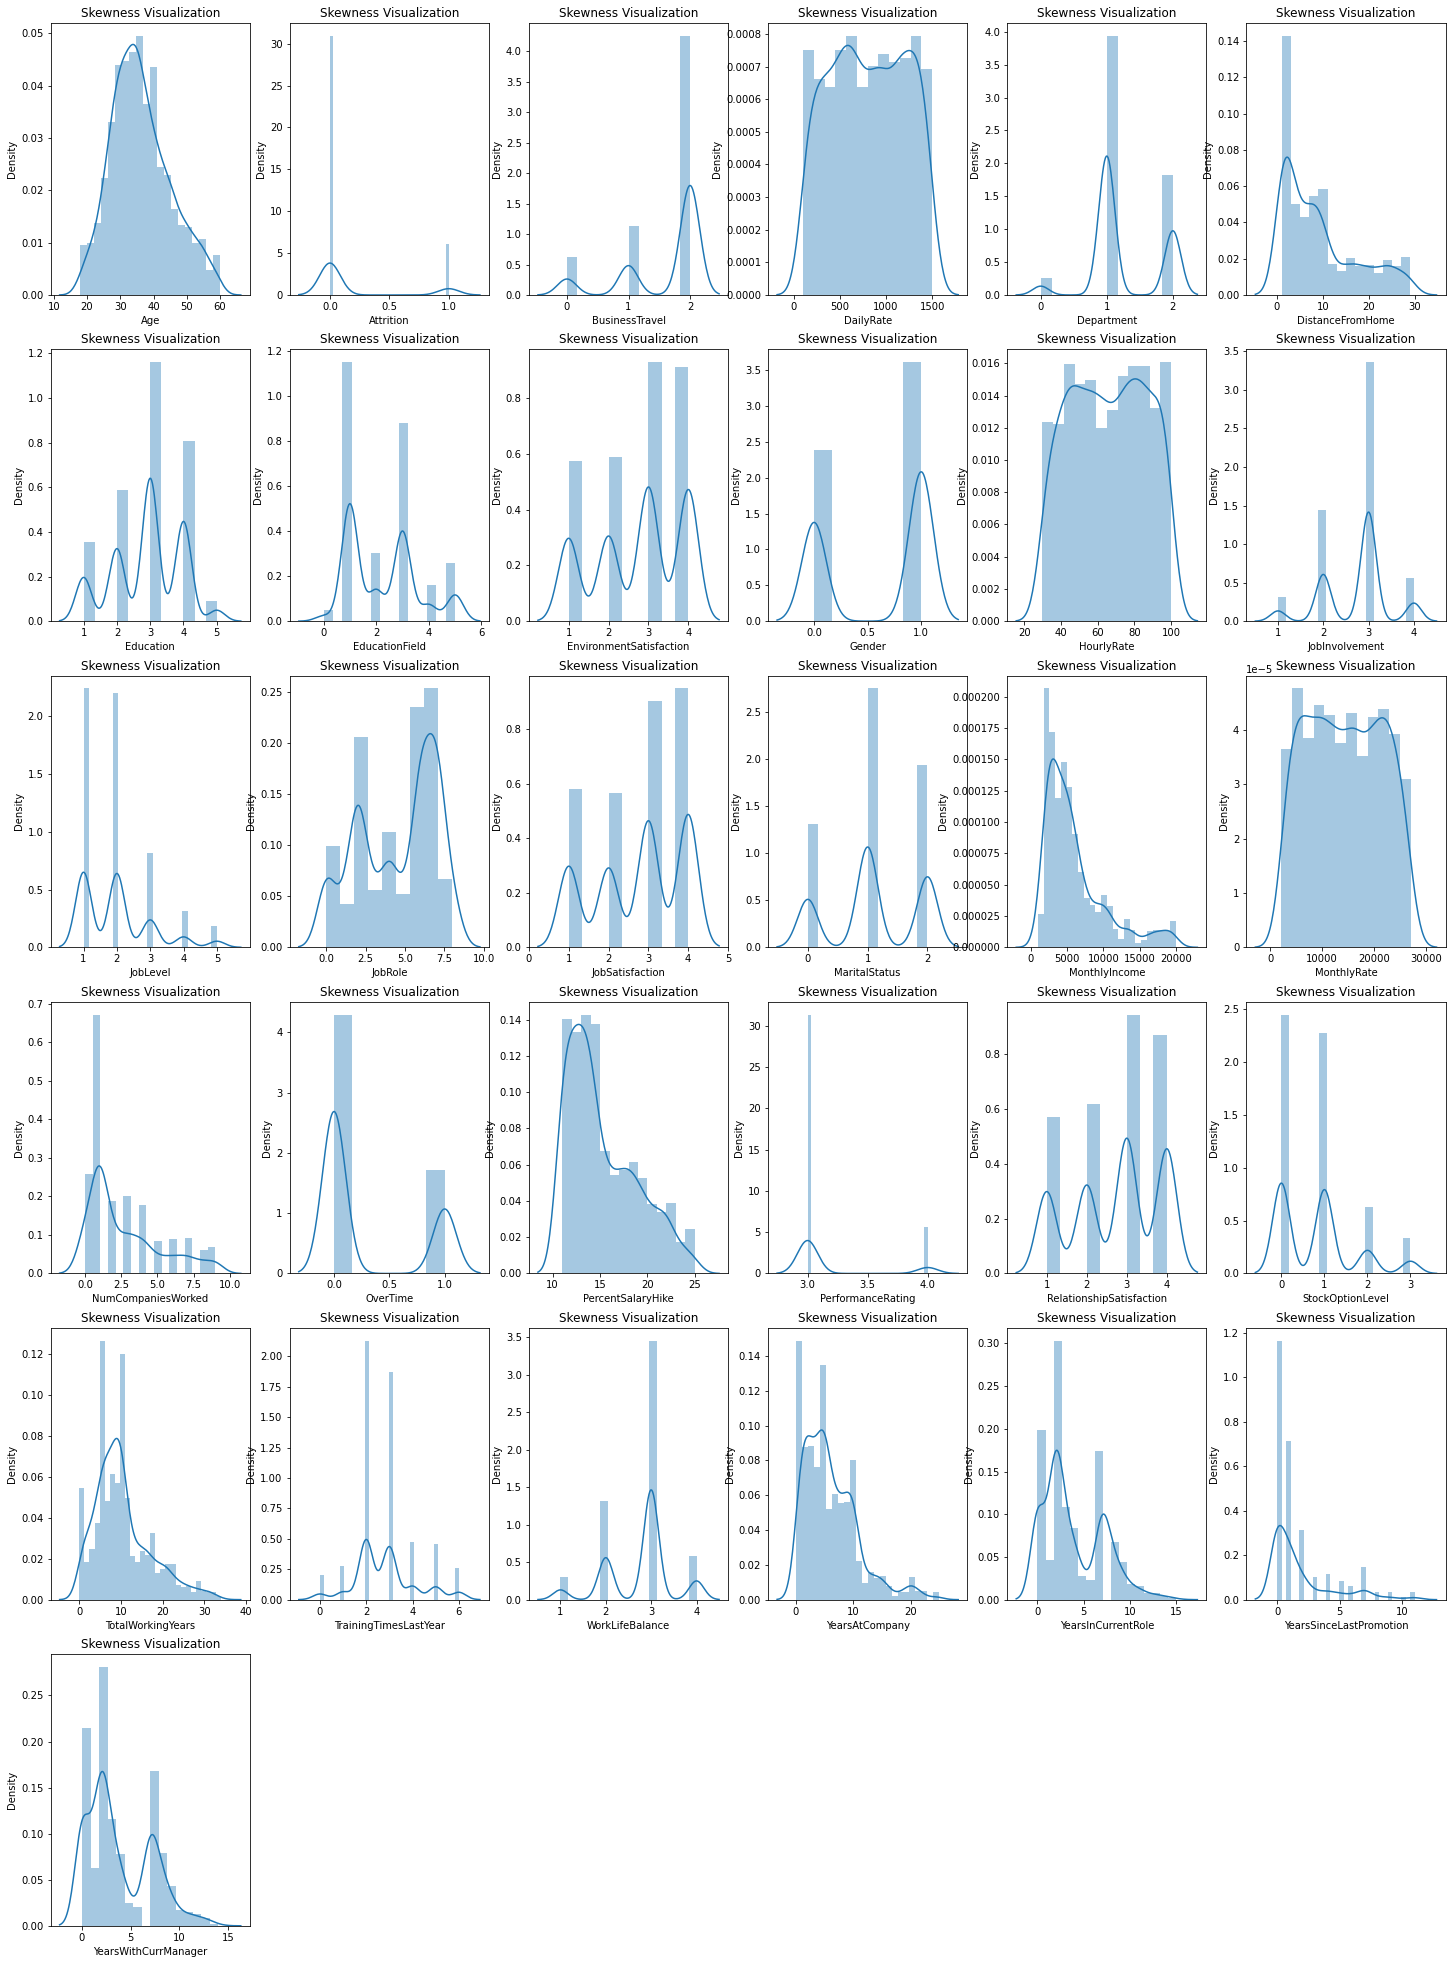

In [48]:
plt.figure(figsize=(25,35))
plotnumber=1
for column in df:
    if plotnumber<=36:
        plt.subplot(6,6,plotnumber)
        ax=sns.distplot(df[column])
        plt.title('Skewness Visualization')
    plotnumber+=1
    
plt.show() 

**Observations**

**We have found data is skewed for arounf 70% of features since data set is small we will be using Power Transformer to remove the skewness of data**

In [49]:
x= df.drop(columns=['Attrition'])
y = df['Attrition']

**Using Power Transformer to Remove Skewness***

In [50]:
from sklearn.preprocessing import PowerTransformer

In [51]:
p_transform = PowerTransformer(method = 'yeo-johnson')
x = pd.DataFrame(p_transform.fit_transform(x), columns=x.columns)
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.610133,0.638730,0.750615,1.379881,-1.489968,-0.902402,-0.965129,-0.712215,-1.229911,1.359498,...,-1.665335e-16,-1.524369,-1.084263,-0.173231,-2.608524,-2.14795,0.231837,0.290524,-1.073534,0.582177
1,1.371830,-1.380776,-1.343372,-0.473500,0.244561,-1.759177,-0.965129,0.204826,0.813067,-0.208763,...,9.298118e-16,1.235448,0.548653,0.147620,0.217074,0.27486,0.948319,1.006575,0.193168,1.018073
2,0.182486,0.638730,1.337080,-0.473500,-1.028366,-0.902402,1.239552,1.210036,0.813067,1.267832,...,-1.665335e-16,-0.690386,-1.084263,-0.351153,0.217074,0.27486,-2.156089,-1.571814,-1.073534,-1.528426
3,-0.284736,-1.380776,1.377080,-0.473500,-0.698191,1.102042,-0.965129,1.210036,-1.229911,-0.458919,...,-1.665335e-16,0.235192,-1.084263,-0.173231,0.217074,0.27486,0.621429,1.006575,1.027520,-1.528426
4,-1.080489,0.638730,-0.467301,-0.473500,-1.028366,-1.759177,0.689982,-1.522916,0.813067,-1.290538,...,-1.665335e-16,1.235448,0.548653,-0.544046,0.217074,0.27486,-0.933983,-0.390769,0.722874,-0.347871


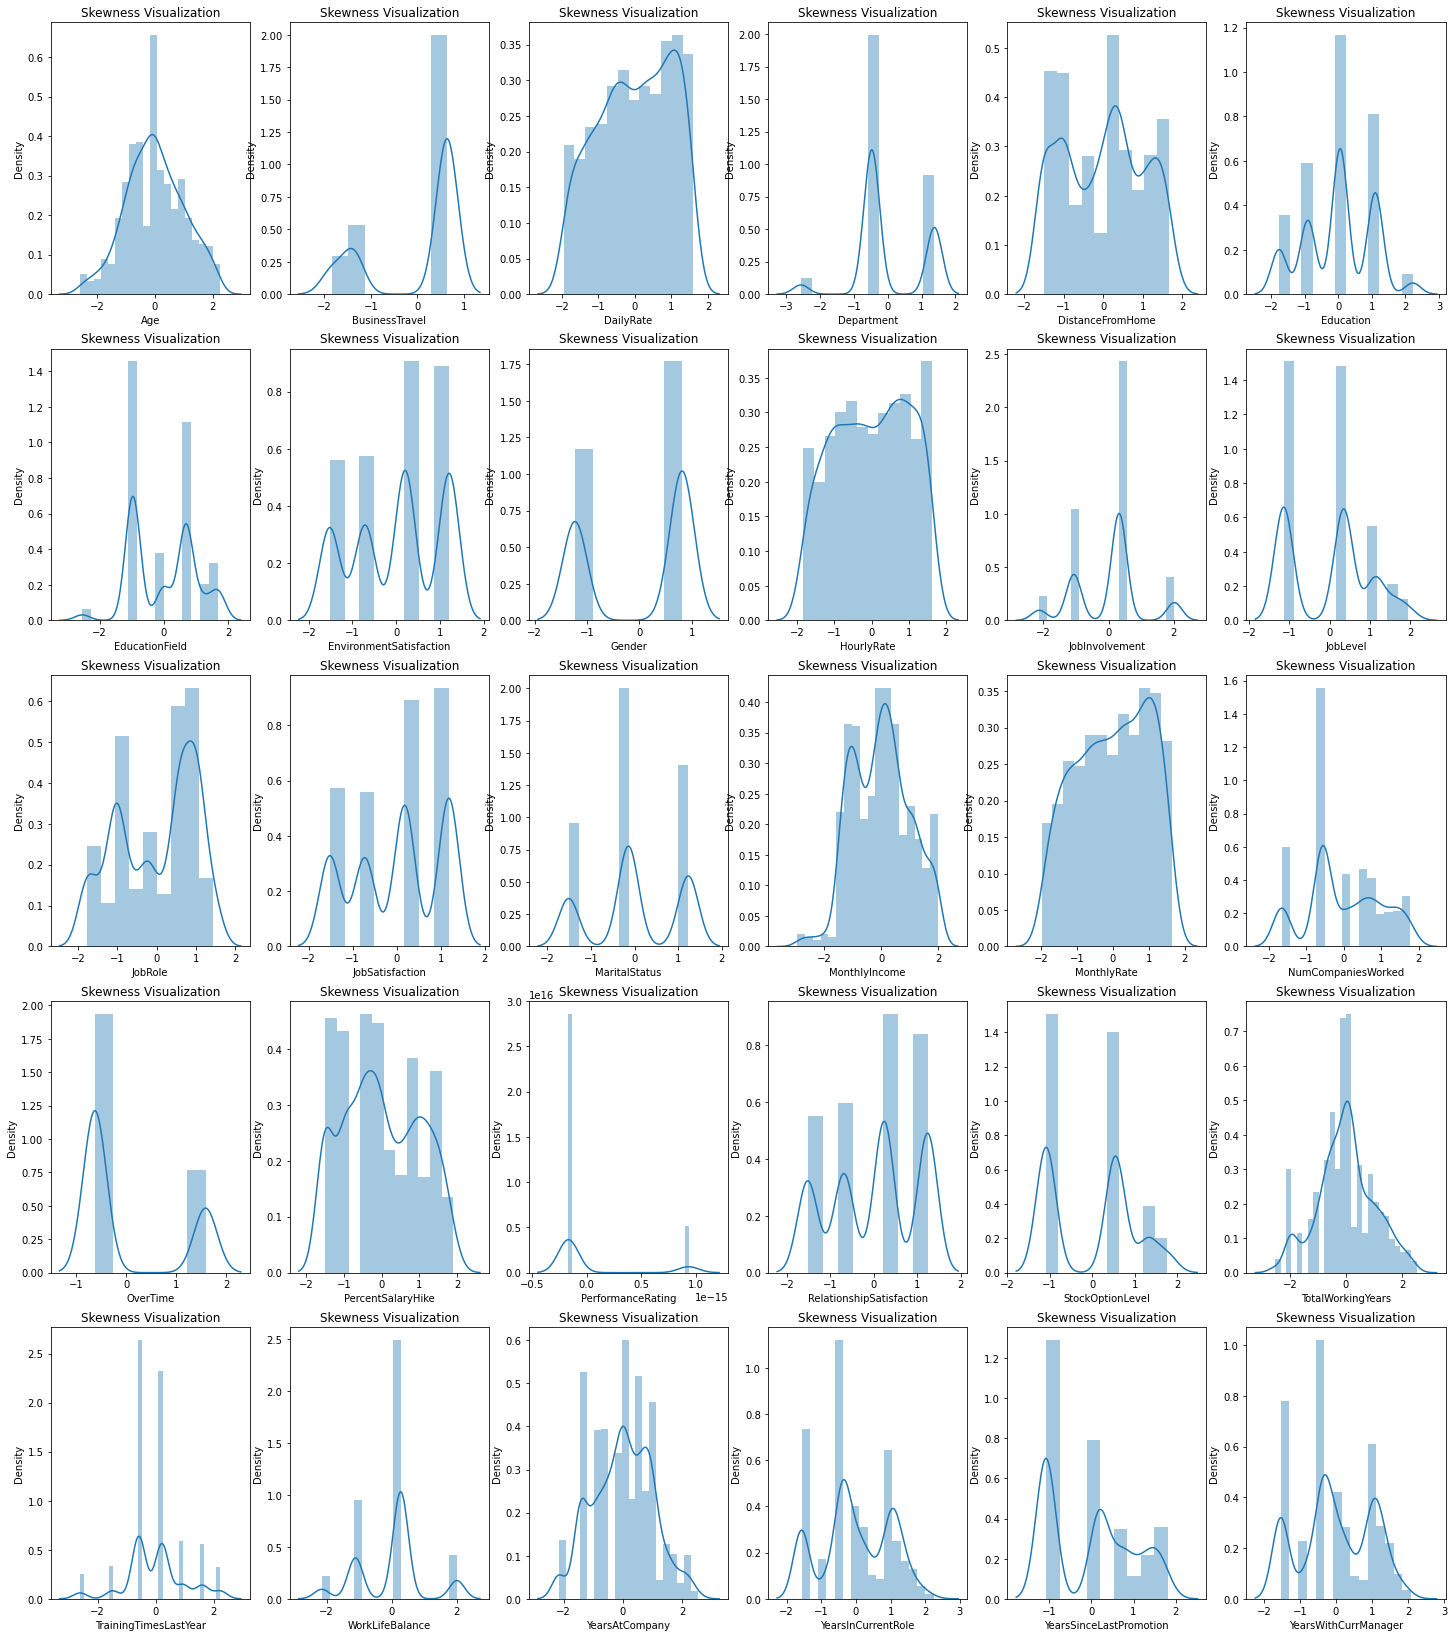

In [52]:
plt.figure(figsize=(25,35))
plotnumber=1
for column in x:
    if plotnumber<=36:
        plt.subplot(6,6,plotnumber)
        ax=sns.distplot(x[column])
        plt.title('Skewness Visualization')
    plotnumber+=1
    
plt.show() 

**Skewness of data is in complete controll**

**Multi-collinearity check by using Heatmap**

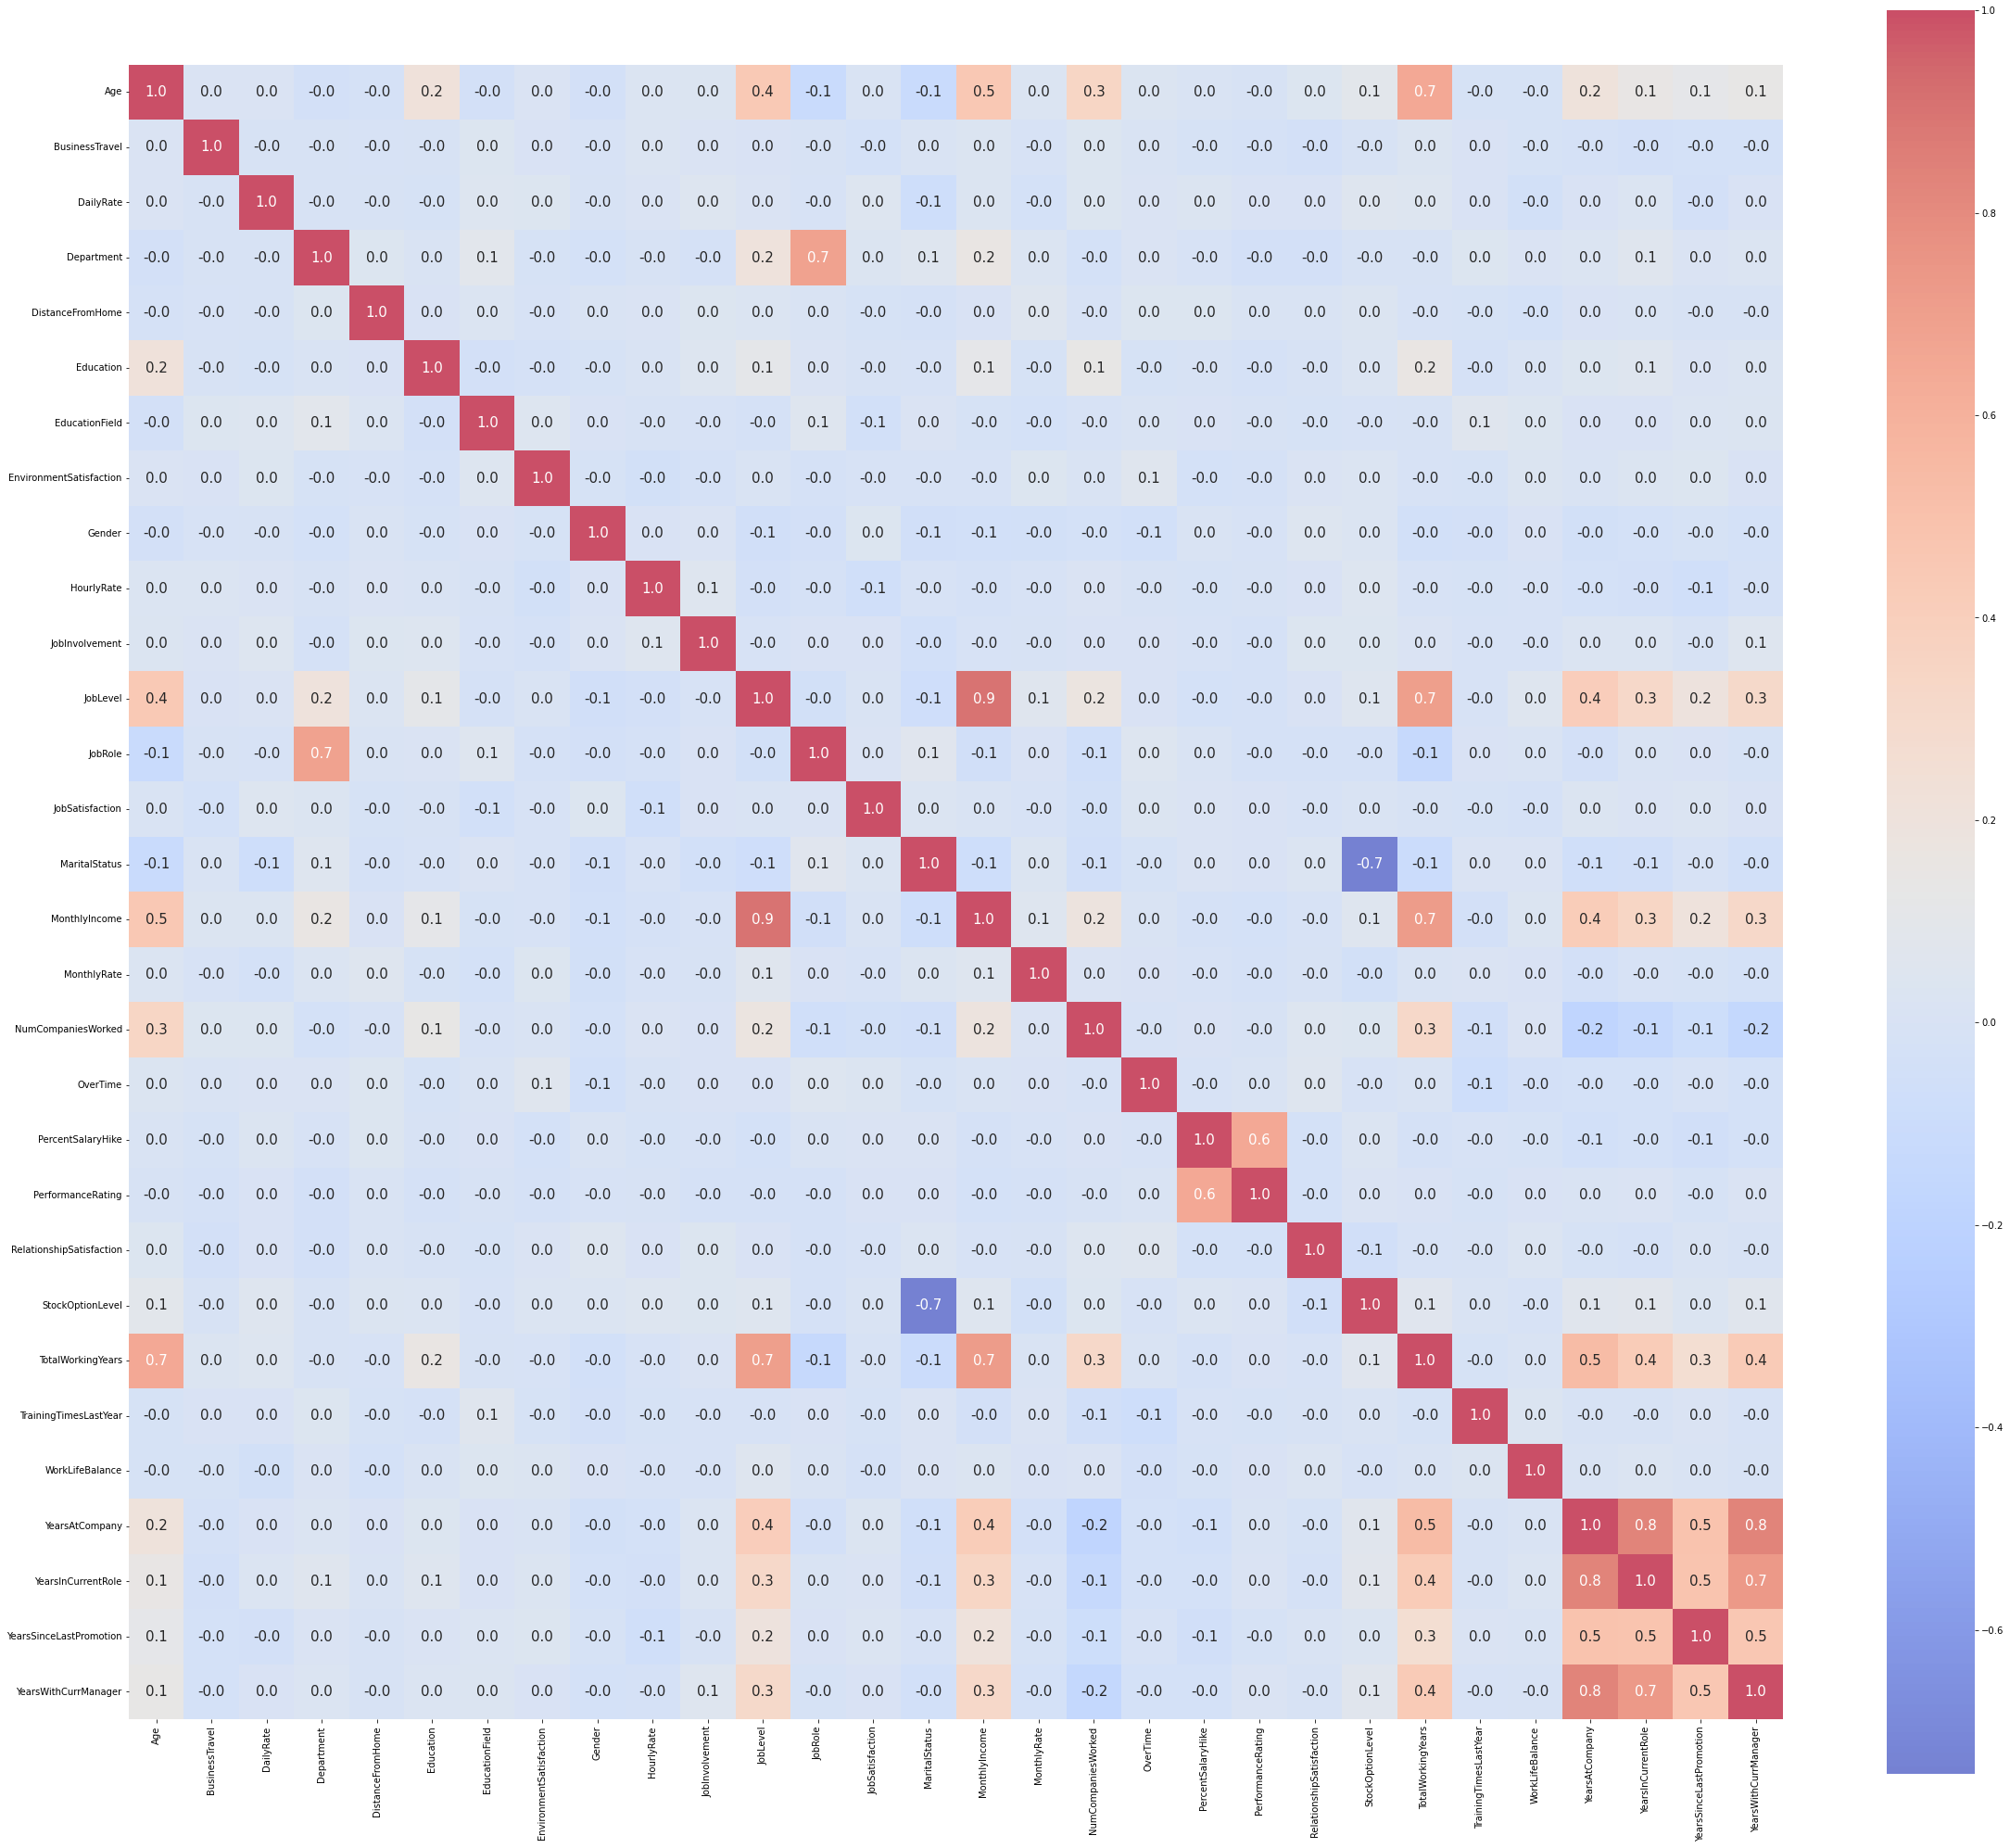

In [53]:
coreleation= x.corr()
plt.figure(figsize=(40,35))
sns.heatmap(coreleation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size': 15},xticklabels=x.columns,yticklabels=x.columns,alpha=0.7,cmap= 'coolwarm')
plt.show()

**No feature has been visualized to cross bareminimum threshold of 85% for MultiCollinearity as we have stated above we will not delete any of feature hence by visualizing the same we are keeping all of them**

**VIF**

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
vif_data = pd.DataFrame()
vif_data["Features List"]=x.columns
vif_data["VIF Value"]=[variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
vif_data

,Features List,VIF Value
0,Age,1.930457
1,BusinessTravel,1.014314
2,DailyRate,1.025841
3,Department,2.172093
4,DistanceFromHome,1.017385
5,Education,1.065266
6,EducationField,1.030480
7,EnvironmentSatisfaction,1.024396
8,Gender,1.024366
9,HourlyRate,1.024189


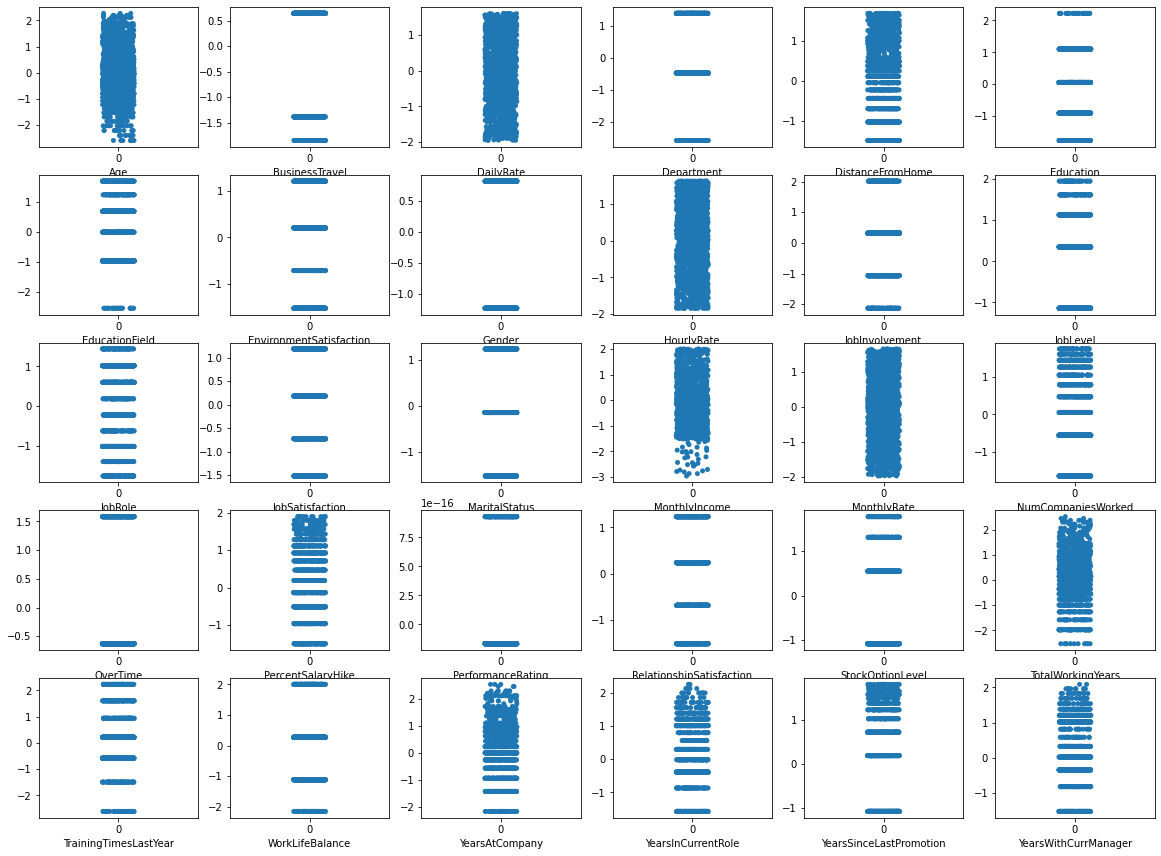

In [56]:
plt.figure(figsize=(20,18))
plotnumber=1
for column in x:
    if plotnumber<=36:
        plt.subplot(6,6,plotnumber)
        ax=sns.stripplot(data=x[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.show()   

**Observations**

**Categorical and Continuous features are in well shape and distribution has been visualized as satisfactory**

**We can proceed with Model building**

In [57]:
##Importing necessary Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [58]:
##Scaling data using Standard Scaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.610133,0.638730,0.750615,1.379881,-1.489968,-0.902402,-0.965129,-0.712215,-1.229911,1.359498,...,-0.424765,-1.524369,-1.084263,-0.173231,-2.608524,-2.14795,0.231837,0.290524,-1.073534,0.582177
1,1.371830,-1.380776,-1.343372,-0.473500,0.244561,-1.759177,-0.965129,0.204826,0.813067,-0.208763,...,2.354241,1.235448,0.548653,0.147620,0.217074,0.27486,0.948319,1.006575,0.193168,1.018073
2,0.182486,0.638730,1.337080,-0.473500,-1.028366,-0.902402,1.239552,1.210036,0.813067,1.267832,...,-0.424765,-0.690386,-1.084263,-0.351153,0.217074,0.27486,-2.156089,-1.571814,-1.073534,-1.528426
3,-0.284736,-1.380776,1.377080,-0.473500,-0.698191,1.102042,-0.965129,1.210036,-1.229911,-0.458919,...,-0.424765,0.235192,-1.084263,-0.173231,0.217074,0.27486,0.621429,1.006575,1.027520,-1.528426
4,-1.080489,0.638730,-0.467301,-0.473500,-1.028366,-1.759177,0.689982,-1.522916,0.813067,-1.290538,...,-0.424765,1.235448,0.548653,-0.544046,0.217074,0.27486,-0.933983,-0.390769,0.722874,-0.347871


**Finding Best Accuracy on Random State***

In [59]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (accuracy_score(y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 91.93083573487031 on Random State 431


**Splitting data for Training and Testing by using Train_Test_Split**

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=431)


**Defining a function to print Accuracy_score,CV_Score,printing Classification_report and finally the result by deducting Accuracy score from CV score to choose the least difference model**

In [61]:
# Classification Model Function

def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=431)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting Y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

**Logistic Regression**

In [62]:
# Logistic Regression

model=LogisticRegression()
classify(model, x, y)

Accuracy Score: 91.93083573487031

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       309
           1       0.71      0.45      0.55        38

    accuracy                           0.92       347
   macro avg       0.82      0.71      0.75       347
weighted avg       0.91      0.92      0.91       347

Cross Validation Score: 86.87842505778771

Accuracy Score - Cross Validation Score is 5.052410677082605


**Support Vector Classifier**

In [63]:
#Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, x, y)

Accuracy Score: 91.35446685878964

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       309
           1       0.79      0.29      0.42        38

    accuracy                           0.91       347
   macro avg       0.85      0.64      0.69       347
weighted avg       0.90      0.91      0.90       347

Cross Validation Score: 86.44599122146326

Accuracy Score - Cross Validation Score is 4.908475637326376


**Decision Tree Classifier**

In [64]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, x, y)

Accuracy Score: 78.96253602305475

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       309
           1       0.23      0.39      0.29        38

    accuracy                           0.79       347
   macro avg       0.57      0.62      0.58       347
weighted avg       0.84      0.79      0.81       347

Cross Validation Score: 78.0806690387762

Accuracy Score - Cross Validation Score is 0.8818669842785596


**Random Forest Classifier**

In [65]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, x, y)

Accuracy Score: 90.48991354466858

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       309
           1       0.69      0.24      0.35        38

    accuracy                           0.90       347
   macro avg       0.80      0.61      0.65       347
weighted avg       0.89      0.90      0.88       347

Cross Validation Score: 85.43542061657533

Accuracy Score - Cross Validation Score is 5.054492928093254


**KNeighbours Classifier**

In [66]:
# KNeighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, x, y)

Accuracy Score: 89.62536023054754

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.94       309
           1       0.75      0.08      0.14        38

    accuracy                           0.90       347
   macro avg       0.82      0.54      0.54       347
weighted avg       0.88      0.90      0.86       347

Cross Validation Score: 84.35472560579696

Accuracy Score - Cross Validation Score is 5.270634624750585


**XGB Classifier**

In [67]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, x, y)

Accuracy Score: 90.20172910662824

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       309
           1       0.58      0.39      0.47        38

    accuracy                           0.90       347
   macro avg       0.75      0.68      0.71       347
weighted avg       0.89      0.90      0.89       347

Cross Validation Score: 85.72474872087889

Accuracy Score - Cross Validation Score is 4.476980385749343


# Hyperparameter Tuning of DecisionTreeClassifier

In [68]:


fmod_param = {'criterion' : ["gini", "entropy"],
              'splitter' : ["best", "random"],
              'min_samples_split' : [2, 3, 4],
              'max_depth' : [4, 6, 8],
              'random_state' : [42, 111, 759]
             }

In [69]:
GSCV = GridSearchCV(DecisionTreeClassifier(), fmod_param, cv=5)


In [70]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8], 'min_samples_split': [2, 3, 4],
                         'random_state': [42, 111, 759],
                         'splitter': ['best', 'random']})

In [71]:
GSCV.best_params_


{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_split': 2,
 'random_state': 42,
 'splitter': 'random'}

In [72]:
Final_Model = DecisionTreeClassifier(criterion="entropy", max_depth=4, min_samples_split=2, 
                                     random_state=42, splitter="random")
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 89.33717579250721


**ROC Curve**

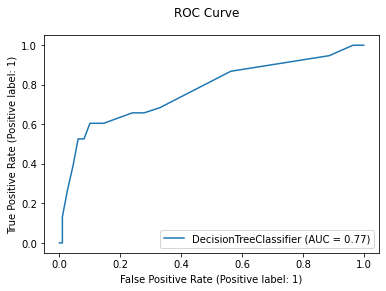

In [73]:
auc = metrics.plot_roc_curve(Final_Model, x_test, y_test)
auc.figure_.suptitle("ROC Curve")
plt.show()

**Confusion Matrix**

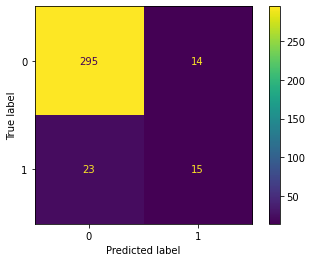

In [74]:
metrics_n = df.columns
metrics.plot_confusion_matrix(Classifier, x_test, y_test)

plt.show()

**Saving Final model**

In [75]:
import joblib
import pickle

In [76]:
filename = "FinalModel_DT.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_DT.pkl']

**Model is completed**